# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Frans Gabriel Sianturi
- Email: franssianturi99@gmail.com 
- Id Dicoding: frans

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

from scipy.stats import uniform, randint
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
hr_df = pd.read_csv("employee_data.csv", encoding='windows-1252')
hr_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Preparation / Preprocessing

### Summary Data

In [3]:
# Cek summary
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Features data:
- EmployeeId: Employee Identifier
- Attrition: Did the employee attrition? (0=no, 1=yes)
- Age: Age of the employee
- BusinessTravel: Travel commitments for the job
- DailyRate: Daily salary
- Department: Employee Department
- DistanceFromHome: Distance from work to home (in km)
- Education: 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
- EducationField: Field of Education
- EnvironmentSatisfaction: 1-Low, 2-Medium, 3-High, 4-Very High
- Gender: Employee's gender
- HourlyRate: Hourly salary
- JobInvolvement: 1-Low, 2-Medium, 3-High, 4-Very High
- JobLevel: Level of job (1 to 5)
- JobRole: Job Roles
- JobSatisfaction: 1-Low, 2-Medium, 3-High, 4-Very High
- MaritalStatus: Marital Status
- MonthlyIncome: Monthly salary
- MonthlyRate: Mounthly rate
- NumCompaniesWorked: Number of companies worked at
- Over18: Over 18 years of age?
- OverTime: Overtime?
- PercentSalaryHike: The percentage increase in salary last year
- PerformanceRating: 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- RelationshipSatisfaction: 1-Low, 2-Medium, 3-High, 4-Very High
- StandardHours: Standard Hours
- StockOptionLevel: Stock Option Level
- TotalWorkingYears: Total years worked
- TrainingTimesLastYear: Number of training attended last year
- WorkLifeBalance: 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- YearsAtCompany: Years at Company
- YearsInCurrentRole: Years in the current role
- YearsSinceLastPromotion: Years since the last promotion
- YearsWithCurrManager: Years with the current manager

In [4]:
# Unique value pada fitur kategorikal
for features in hr_df.select_dtypes(include='object'):
    print(features)
    print(hr_df[features].unique(), '\n')

BusinessTravel
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

Department
['Human Resources' 'Research & Development' 'Sales'] 

EducationField
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender
['Male' 'Female'] 

JobRole
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative'] 

MaritalStatus
['Married' 'Single' 'Divorced'] 

Over18
['Y'] 

OverTime
['Yes' 'No'] 



In [5]:
# Analisis deskriptif statistik
hr_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Analisis deskriptif statistik untuk tipe data objek
hr_df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


Berdasarkan hasil analisis statistik deskriptif, semua karyawan berusia di atas 18 tahun yang dapat dilihat pada fitur Over18 yang unik hanya 1 data yaitu Y. Selain itu, fitur EmployeeCount juga hanya memiliki 1 nilai unik. Sehingga 2 fitur tersebut dapat dihilangkan karena tidak memiliki pengaruh besar terhadap permasalahan bisnis.

In [7]:
hr_df = hr_df.drop(['Over18', 'EmployeeCount'], axis=1)
hr_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,4,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,...,2,80,1,6,0,3,4,2,0,0


### Missing Values and Duplicate Data

In [8]:
# Cek missing values
hr_df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSin

In [9]:
# Tampilkan data dari missing values
hr_df[hr_df.isna().any(axis=1)]

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,4,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,3,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,4,...,3,80,2,7,6,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,24,NaN,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,...,3,80,0,6,2,3,6,3,1,3
1447,1448,42,NaN,Travel_Frequently,288,Research & Development,2,3,Life Sciences,4,...,3,80,1,24,3,1,20,8,13,9
1448,1449,38,NaN,Travel_Rarely,437,Sales,16,3,Life Sciences,2,...,2,80,0,8,5,4,3,2,1,2
1462,1463,41,NaN,Travel_Rarely,1206,Sales,23,2,Life Sciences,4,...,4,80,0,21,2,3,2,0,0,2


In [10]:
# Kelompokkan berdasarkan departemen dari missing values
hr_df[hr_df['Attrition'].isnull()].groupby('Department').size()


Department
Human Resources            25
Research & Development    260
Sales                     127
dtype: int64

Karena dataset memiliki beberapa nilai yang hilang pada fitur Attrition yang merupakan fitur data utama berdasarkan masalah bisnis yang ingin diselesaikan maka perlu untuk membuang data yang hilang.

In [11]:
hr_df.dropna(inplace=True)
print(hr_df.isna().sum())

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [12]:
# Cek jumlah setelah menangani missing values
hr_df.shape

(1058, 33)

In [13]:
# Cek duplikat data
hr_df.duplicated().sum()

0

In [14]:
# Cek tipe data attrition
hr_df['Attrition'].dtypes

dtype('float64')

In [15]:
# Ubah tipe data attrition dari float ke int64
hr_df['Attrition'] = hr_df['Attrition'].astype('int64')
hr_df['Attrition'].dtypes

dtype('int64')

Ordinal Decoding
- Ordinal Decoding untuk fitur Education, EnvironmentSatisfaction, Jobinvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, and WorkLifeBalance

In [16]:
def ordinal_decoding(hr_df, feature):
    """
    Convert encoded feature in a DataFrame to corresponding categorical labels

    Parameters
        df (pandas.DataFrame) : The DataFrame with feature(s) to be converted
        feature (str or list of str) : The feature name(s) to convert

    Returns
        pandas.DataFrame : The DataFrame with feature(s) as categorical labels
    """

    if feature == 'Attrition':
        category = {0: 'No', 1: 'Yes'}
        hr_df[feature] = hr_df[feature].map(category)
    elif feature == 'Education':
        category = {1: 'Below College', 2: 'College', 3: 'Bachelor',
                    4: 'Master', 5: 'Doctor'}
        hr_df[feature] = hr_df[feature].map(category)
    elif feature in ['WorkLifeBalance', 'PerformanceRating']:
        category = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
        hr_df[feature] = hr_df[feature].map(category)
    else:
        category = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
        for f in feature:
            hr_df[f] = hr_df[f].map(category)

    return hr_df

In [17]:
# Konversi data kategorikal menjadi numerik menggunakan fungsi sebelumnya
hr_df = ordinal_decoding(hr_df, 'Attrition')
hr_df = ordinal_decoding(hr_df, 'Education')
hr_df = ordinal_decoding(hr_df, ['EnvironmentSatisfaction', 'JobInvolvement',
                           'JobSatisfaction', 'RelationshipSatisfaction'])
hr_df = ordinal_decoding(hr_df, ['PerformanceRating', 'WorkLifeBalance'])

hr_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Very High,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Very High,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Medium,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,High,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,...,Low,80,0,10,2,Medium,10,7,1,9
1465,1466,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,...,Very High,80,0,10,4,Very High,1,0,0,0
1467,1468,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,...,Very High,80,0,1,4,Medium,1,1,0,0
1468,1469,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,...,Medium,80,1,6,0,High,4,2,0,0


### Data Clean Export

In [18]:
# Dataset untuk dashboard business
hr_df.to_csv('employee_data_cleaned.csv', index=False)

### Data Understanding

In [19]:
# Cek deskriptif statistik setelah proses ordinal encoding
hr_df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058,1058,1058.000000,1058,1058.000000,1058,1058,1058,...,1058,1058.0,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,2,3,NaN,3,NaN,5,6,4,...,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,Bachelor,Life Sciences,High,...,High,NaN,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN
freq,NaN,NaN,879,746,NaN,701,NaN,410,436,335,...,324,NaN,NaN,NaN,NaN,638,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,NaN,NaN,809.542533,NaN,8.978261,NaN,NaN,NaN,...,NaN,80.0,0.762760,11.435728,2.769376,NaN,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,NaN,NaN,408.478049,NaN,8.040608,NaN,NaN,NaN,...,NaN,0.0,0.837537,8.016429,1.302689,NaN,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,NaN,NaN,102.000000,NaN,1.000000,NaN,NaN,NaN,...,NaN,80.0,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,NaN,NaN,465.250000,NaN,2.000000,NaN,NaN,NaN,...,NaN,80.0,0.000000,6.000000,2.000000,NaN,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,NaN,NaN,817.500000,NaN,7.000000,NaN,NaN,NaN,...,NaN,80.0,1.000000,10.000000,3.000000,NaN,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,NaN,NaN,1168.500000,NaN,13.000000,NaN,NaN,NaN,...,NaN,80.0,1.000000,16.000000,3.000000,NaN,9.000000,7.00000,3.000000,7.000000


#### Heatmap Correlation Matrix

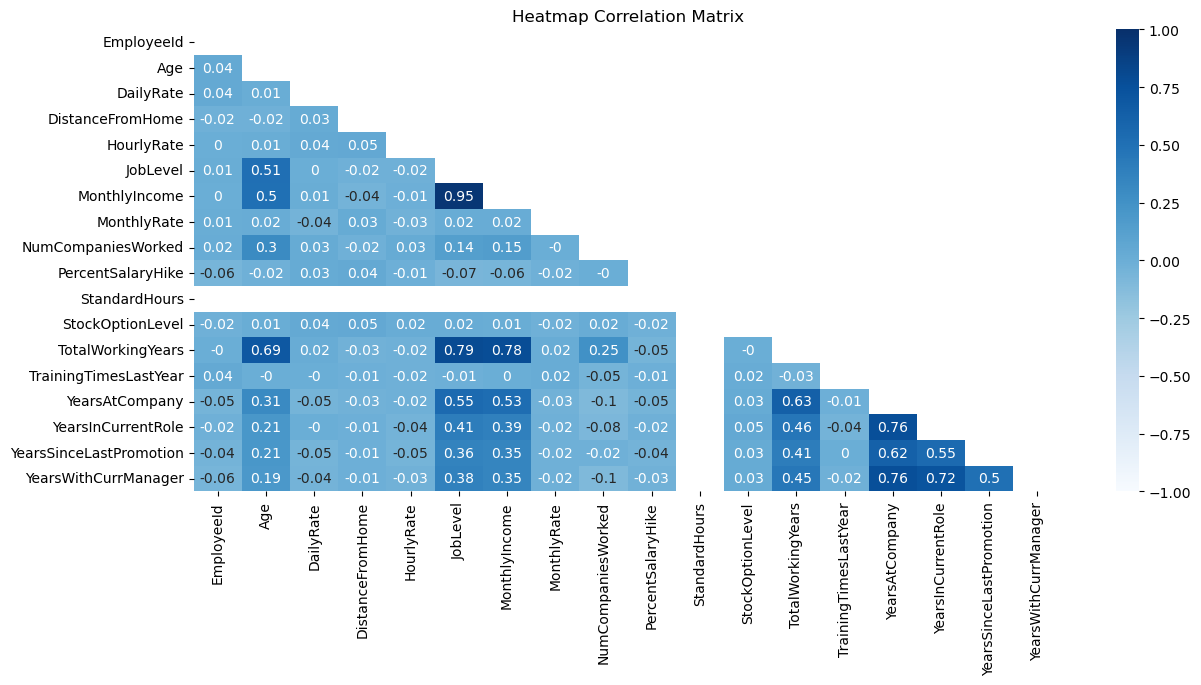

In [20]:
# Penggunaan heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(14, 6))
correlation_matrix = hr_df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='Blues', mask=mask)
plt.title('Heatmap Correlation Matrix')
plt.show()

Berdasarkan plot matriks korelasi di atas, dapat disimpulkan:
- Age memiliki korelasi positif yang cukup kuat dengan TotalWorkingYears, karena semakin bertambahnya usia, maka total masa kerja relatif lebih lama.
- Age memiliki korelasi positif yang cukup kuat dengan JobLevel, karena semakin bertambahnya usia karyawan, umumnya karyawan akan menduduki posisi yang lebih tinggi di perusahaan.
- Age memiliki korelasi positif yang cukup kuat dengan MonthlyIncome, karena semakin bertambahnya usia karyawan, umumnya karyawan akan mendapatkan penghasilan yang lebih besar.
- JobLevel memiliki korelasi positif yang sangat kuat dengan MonthlyIncome, karena karyawan yang lebih senior cenderung mendapatkan penghasilan yang lebih tinggi.
- JobLevel memiliki korelasi positif yang sangat kuat dengan TotalWorkingYears, karena karyawan yang lebih senior umumnya memiliki pengalaman dan masa kerja yang lebih lama.
- JobLevel memiliki korelasi positif yang cukup kuat dengan YeasAtCompany, karena karyawan yang lebih senior cenderung sudah bekerja bertahun-tahun di perusahaan yang sama.
- MonthlyIncome memiliki korelasi positif yang sangat kuat dengan TotalWorkingYears, karena semakin tinggi pendapatan, maka semakin lama pula jumlah tahun bekerja.
- MonthlyIncome memiliki korelasi positif yang cukup kuat dengan YearsAtCompany, karena semakin tinggi pendapatan, umumnya semakin lama karyawan bekerja di perusahaan yang sama.
- TotalWorkingYears memiliki korelasi positif yang cukup kuat dengan YearsAtCompany, karena semakin lama rentang masa kerja, umumnya semakin lama karyawan bekerja di perusahaan yang sama.
- YearsAtCompany memiliki korelasi positif yang sangat kuat dengan YearsInCompanyRole.
- YearsAtCompany di Perusahaan memiliki korelasi positif yang sangat kuat dengan YearsWithCurrentManager.
- YearsAtCompany memiliki korelasi positif yang cukup kuat dengan YearsSinceLastPromotion.
- YearsInCurrentRole memiliki korelasi positif yang sangat kuat dengan YearsWithCurrentManager.
- YearsInCurrentRole memiliki korelasi positif yang cukup kuat dengan YearsSinceLastPromotion.
- YearsSinceLastPromotion memiliki korelasi positif yang cukup kuat dengan YearsWithCurrentManager.

#### Univariate Analysis

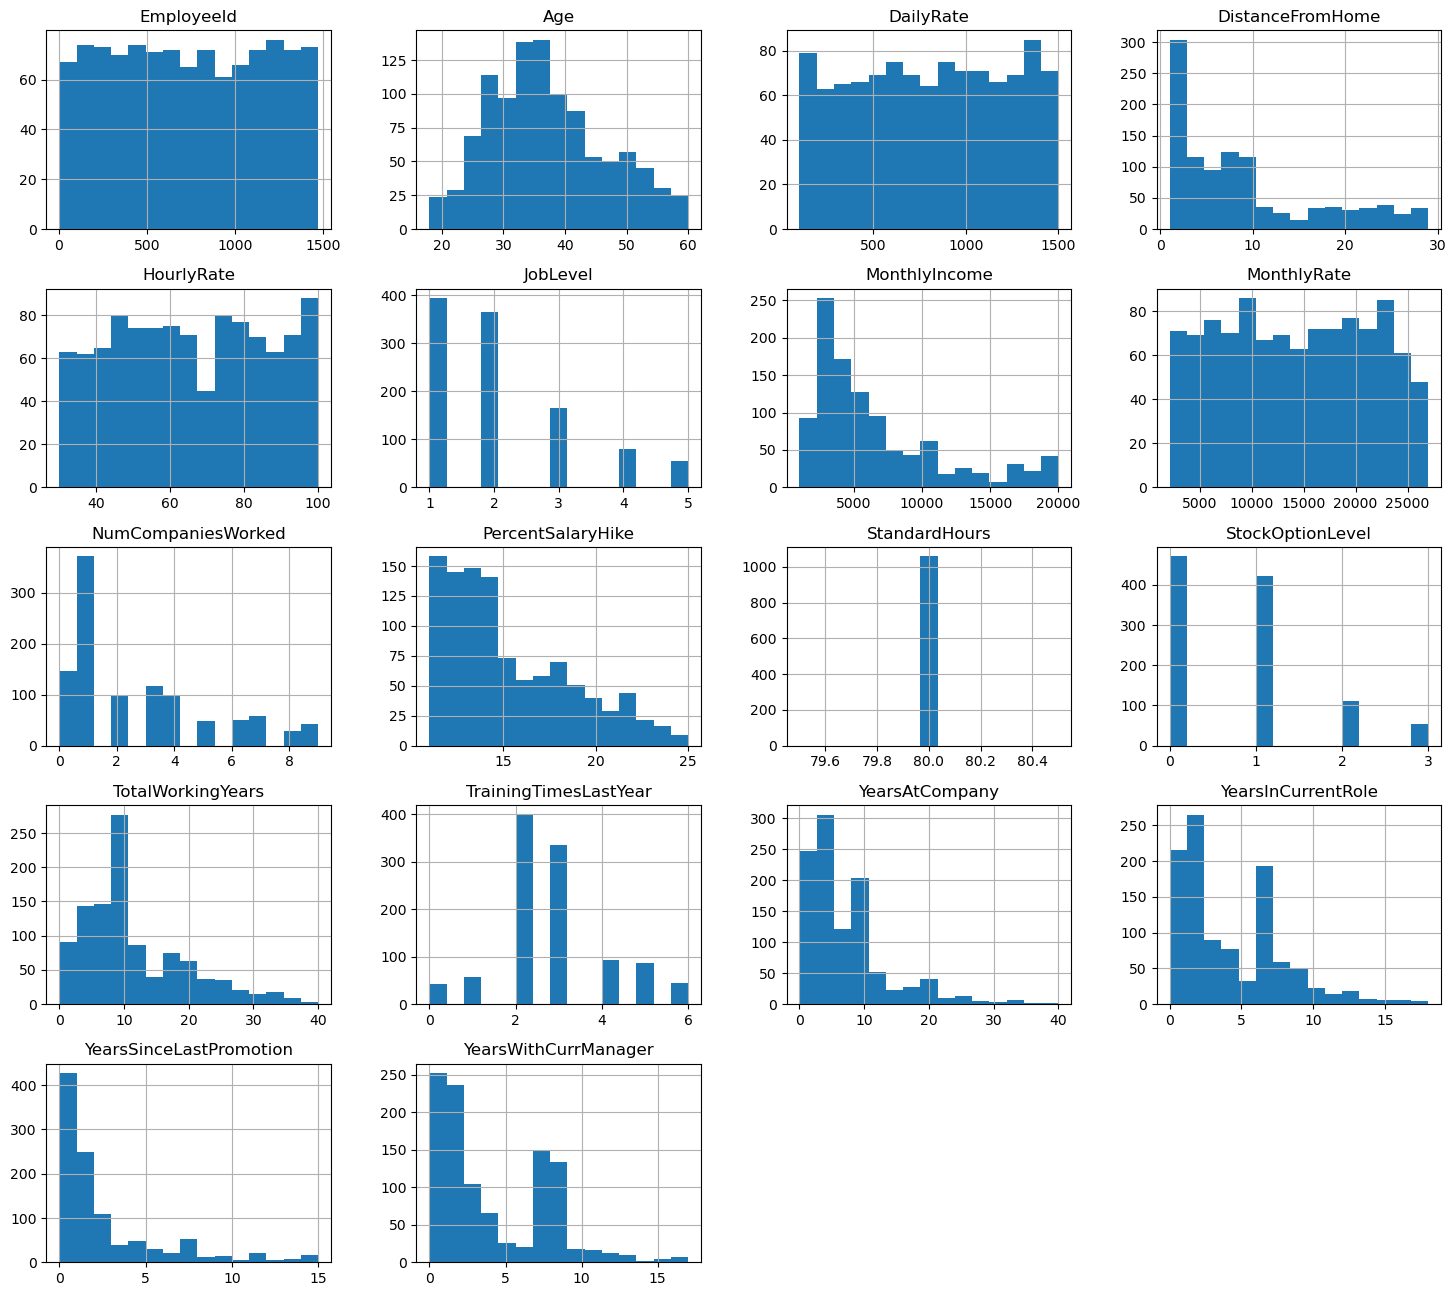

In [21]:
numerical, categorical = [], []

for feature in hr_df.columns:
    if hr_df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

# Analisis univariat fitur numerikal 
hr_df[numerical].hist(bins=15, figsize=(18, 16))
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa terdapat beberapa fitur numerik yang berdistribusi miring ke kanan (right-skewed), seperti DistanceFromHome, MonhtlyIncome, NumCompaniesWorked, PercentageSalaryHike, TotalWorkingYears, YearsAtCompany, YearsCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager. Di sisi lain, fitur Age dan TrainingTimeLastYear diklasifikasikan sebagai distribusi normal.

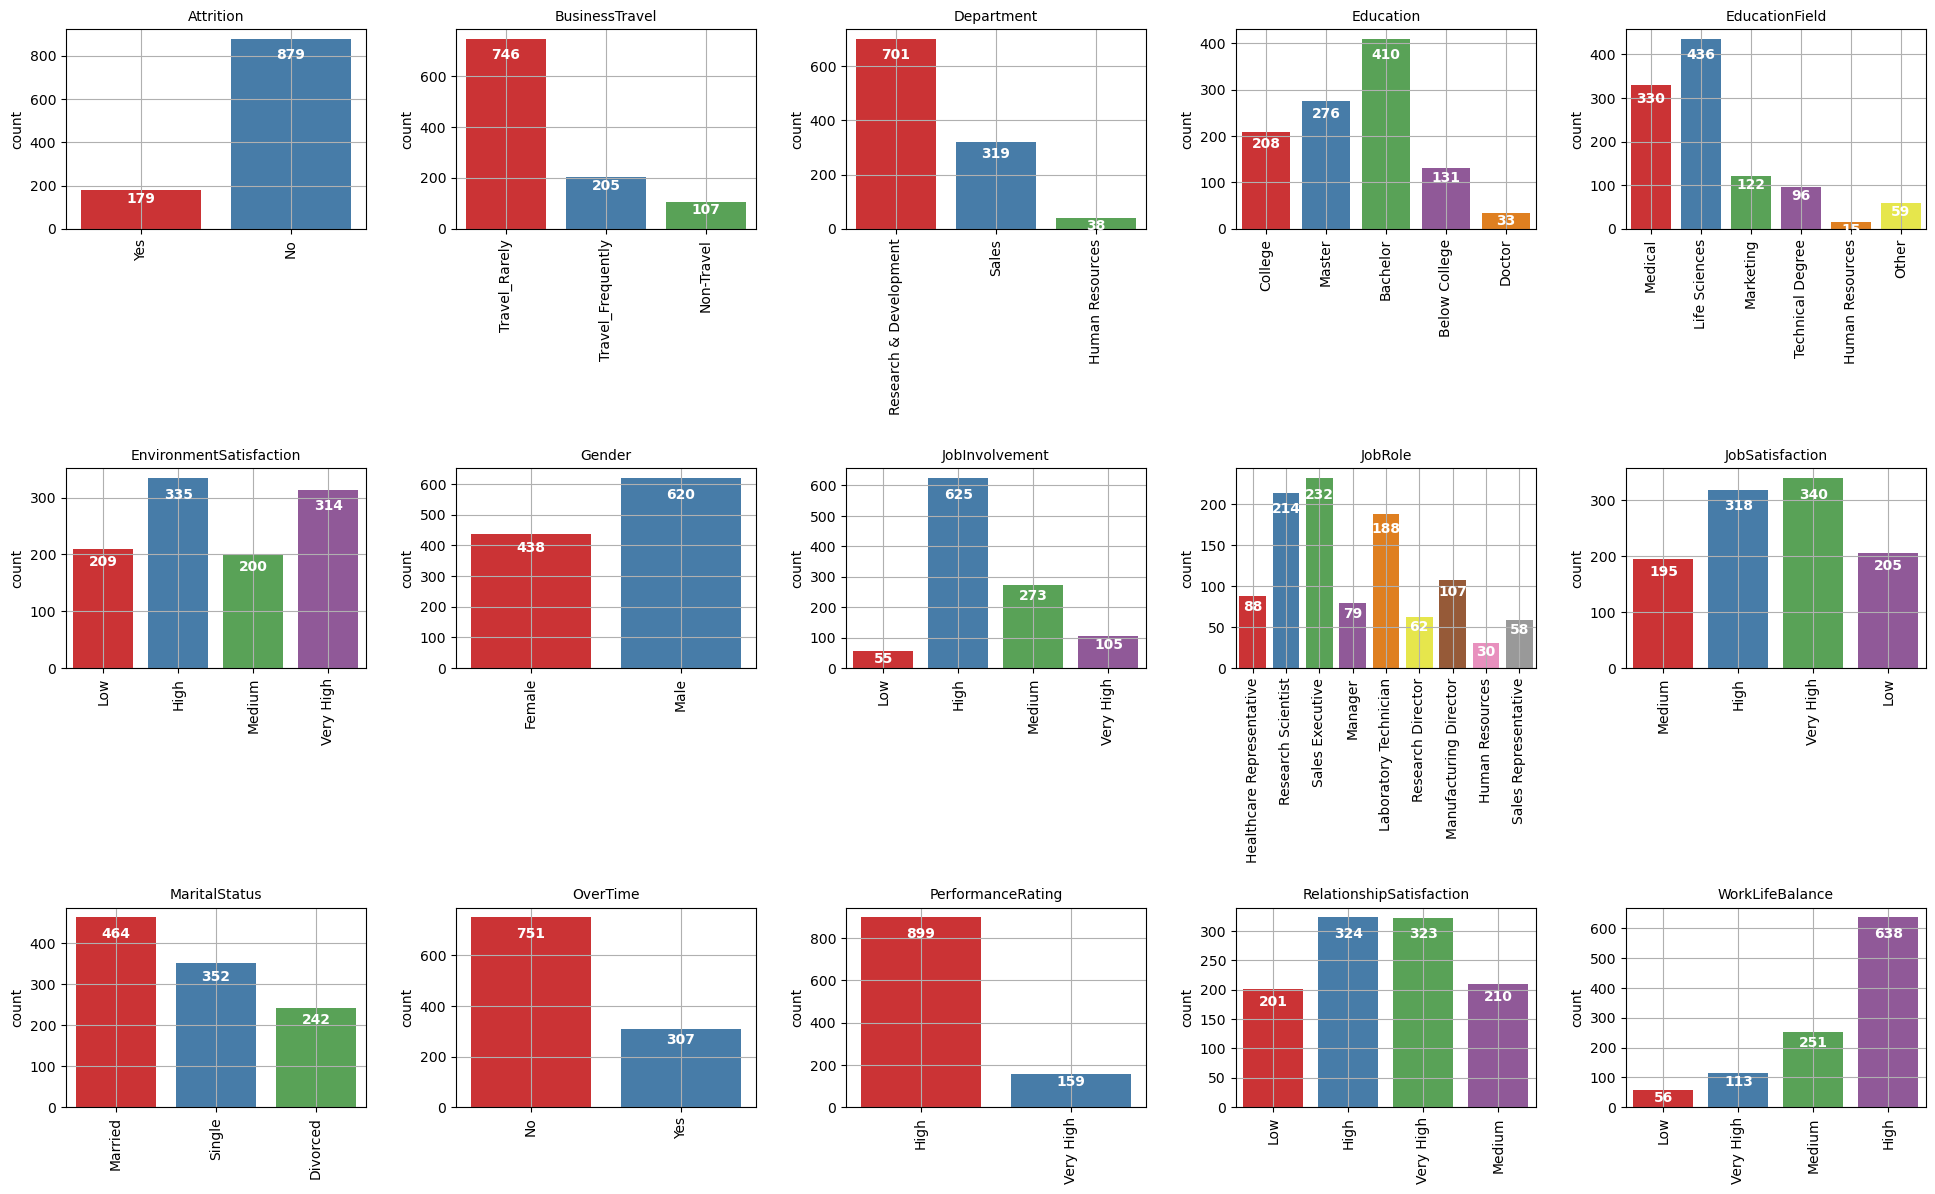

In [22]:
# Analisis univariat fitur kategorikal
fig, ax = plt.subplots(3, 5, figsize=(24, 14))
for i, feature in enumerate(categorical):
    # Ambil indeks baris dan kolom untuk setiap subplot
    row = i // 5
    col = i % 5
    sns.countplot(data=hr_df, x=feature, ax=ax[row, col], hue=feature, palette='Set1')
    ax[row, col].set_title(feature, fontsize=10)
    ax[row, col].set_xlabel('')
    ax[row, col].grid()

    # Defenisikan label
    for bar in ax[row, col].patches:
        ax[row, col].annotate(
            str(int(bar.get_height())),
            (bar.get_x() + bar.get_width() / 2, bar.get_height() - (bar.get_height() * 0.05)),
            ha='center', va='top', fontsize=10, color='white', weight='bold')

    # Rotasi label x-axis
    for label in ax[row, col].get_xticklabels():
        label.set_rotation(90)

# Sembunyikan subplot yang tidak digunakan jika jumlah fitur <16
for j in range(len(categorical), 15):
    fig.delaxes(ax[j // 5, j % 5])

plt.subplots_adjust(hspace=1.2, wspace=0.3)
plt.show()

Berdasarkan grafik di atas dapat disimpulkan bahwa:
- Jumlah karyawan pria lebih banyak dibandingkan dengan karyawan wanita.
- Jumlah karyawan terbanyak berasal dari departemen Research & Development.
- Banyak karyawan yang memiliki latar belakang pendidikan sebagai sarjana.
- Sebagian besar karyawan berasal dari bidang pendidikan ilmu hayati.
- Sebagian besar karyawan memiliki peran pekerjaan sebagai sales executive.
- Jumlah karyawan yang tidak bekerja lembur lebih besar dibandingkan dengan jumlah karyawan yang bekerja lembur.
- Sebagian besar karyawan tidak sering melakukan perjalanan dinas (Jarang Bepergian).
- Sebagian besar karyawan berstatus menikah umumnya karyawan memiliki kepuasan yang tinggi terhadap lingkungan kerja, hubungan kerja yang tinggi, sangat terlibat dalam pekerjaan dan memiliki prestasi kerja yang tinggi.
- Sebagian besar karyawan memiliki keseimbangan antara pekerjaan dan kehidupan pribadi yang sangat baik.

#### Multivariate Analysis

In [23]:
# Analisis multivariat pada fitur numerikal
def numerical_dis_plot(features, hr_df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(2, 2, figsize=(15, 8))
    for i, feature in enumerate(features):
        row = i // 2
        col = i % 2
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=hr_df, ax=ax[row, col], showfliers=showfliers)
            ax[row, col].set_title(f'{segment_feature} Distribution Plot Based on {feature}')
        else:
            sns.boxplot(x=feature, data=hr_df, ax=ax[row, col], showfliers=showfliers)
            ax[row, col].set_title(f'{feature} Distribution Plot')

        ax[row, col].set_ylabel(None)
        ax[row, col].grid(color='lightgray')

    plt.tight_layout()
    plt.show()

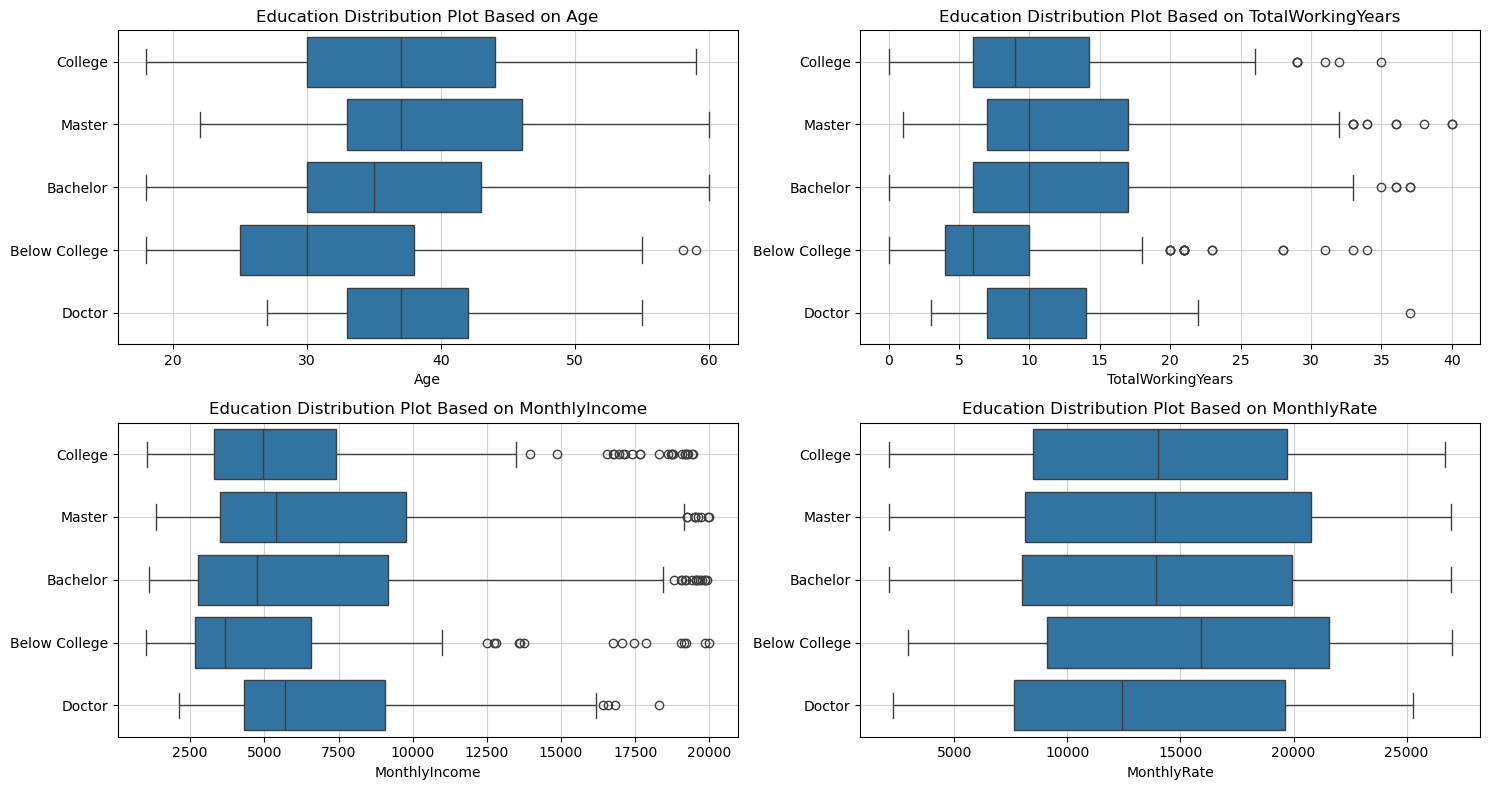

In [24]:
# Distribusi data untuk fitur Age, TotalWorkingYears, MonthlyIncome, dan MonthlyRate
numerical_dis_plot(
    features=['Age', 'TotalWorkingYears', 'MonthlyIncome', 'MonthlyRate'],
    hr_df=hr_df,
    segment_feature='Education'
)

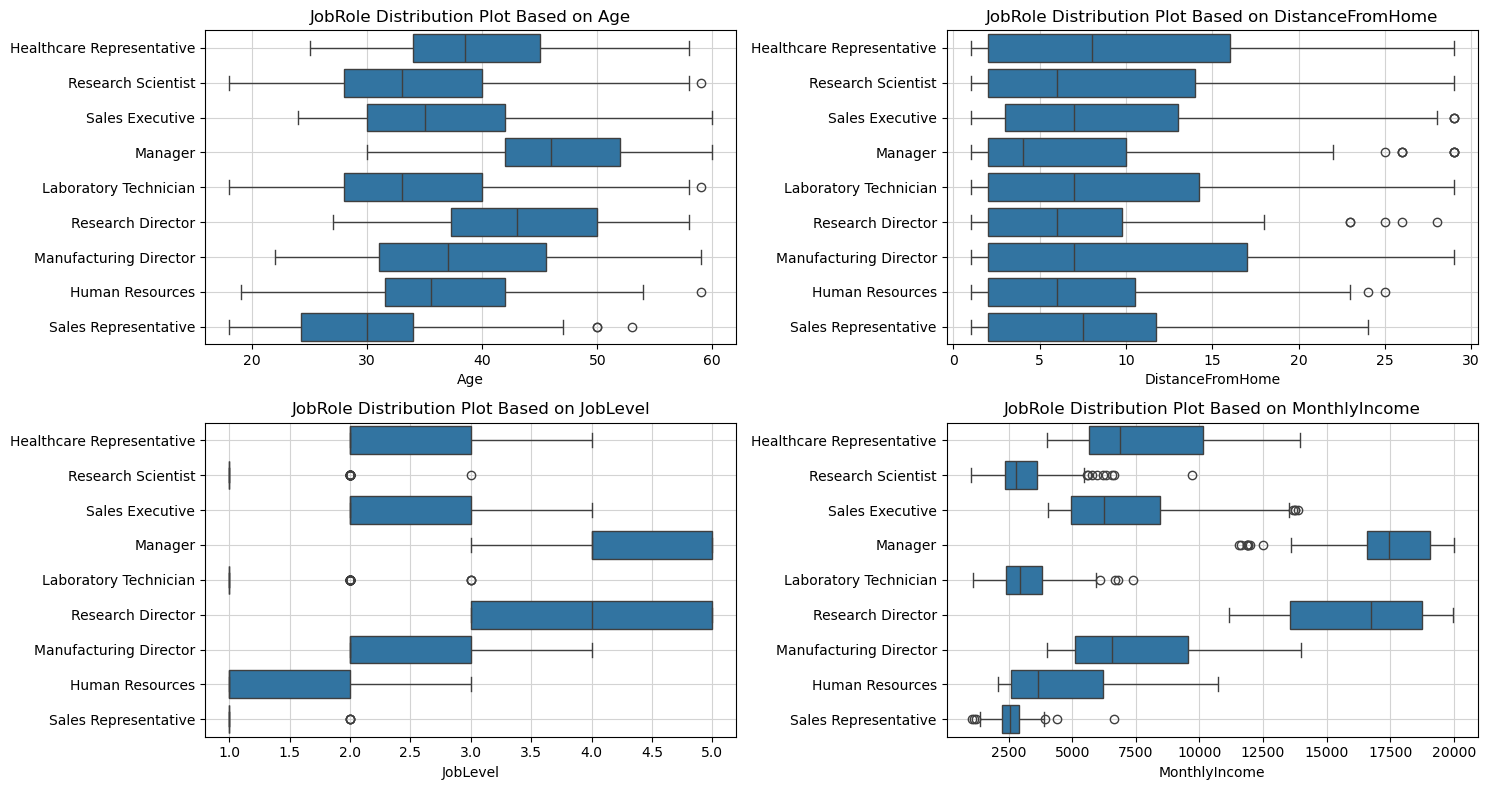

In [25]:
# Distribusi data untuk fitur Age, DistanceFromHome, JobLevel, dan MonthlyIncome
numerical_dis_plot(
    features=['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome'],
    hr_df=hr_df,
    segment_feature='JobRole'
)

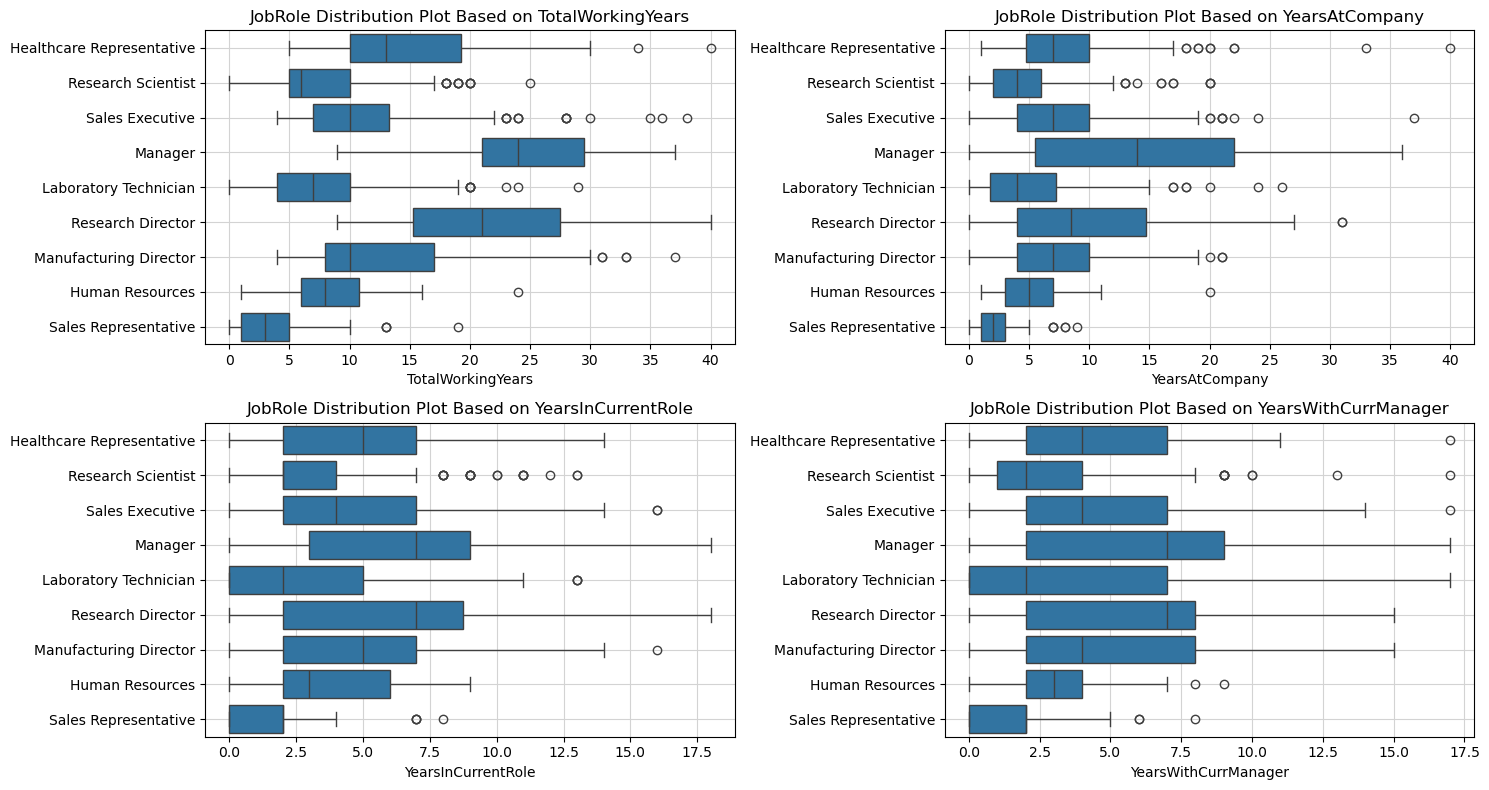

In [26]:
# Distribusi data untuk fitur TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager
numerical_dis_plot(
    features=['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
    hr_df=hr_df,
    segment_feature='JobRole'
)

In [27]:
# Analisis multivariat pada fitur kategorikal
def categorical_dis_plot(features, hr_df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(16, 18))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=hr_df, x=segment_feature, hue=feature, ax=ax[i])
            ax[i].set_title(f'{segment_feature} Distribution Plot Based on {feature}')
        else:
            sns.countplot(data=hr_df, x=feature, ax=ax[i])
            ax[i].set_title(f'{feature} Distribution Plot')

        for bar in ax[i].patches:
            ax[i].annotate(
                str(int(bar.get_height())),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

        ax[i].set_ylabel(None)
        ax[i].grid(True, color='lightgray')

    plt.tight_layout()
    plt.show()

Berdasarkan JobRole

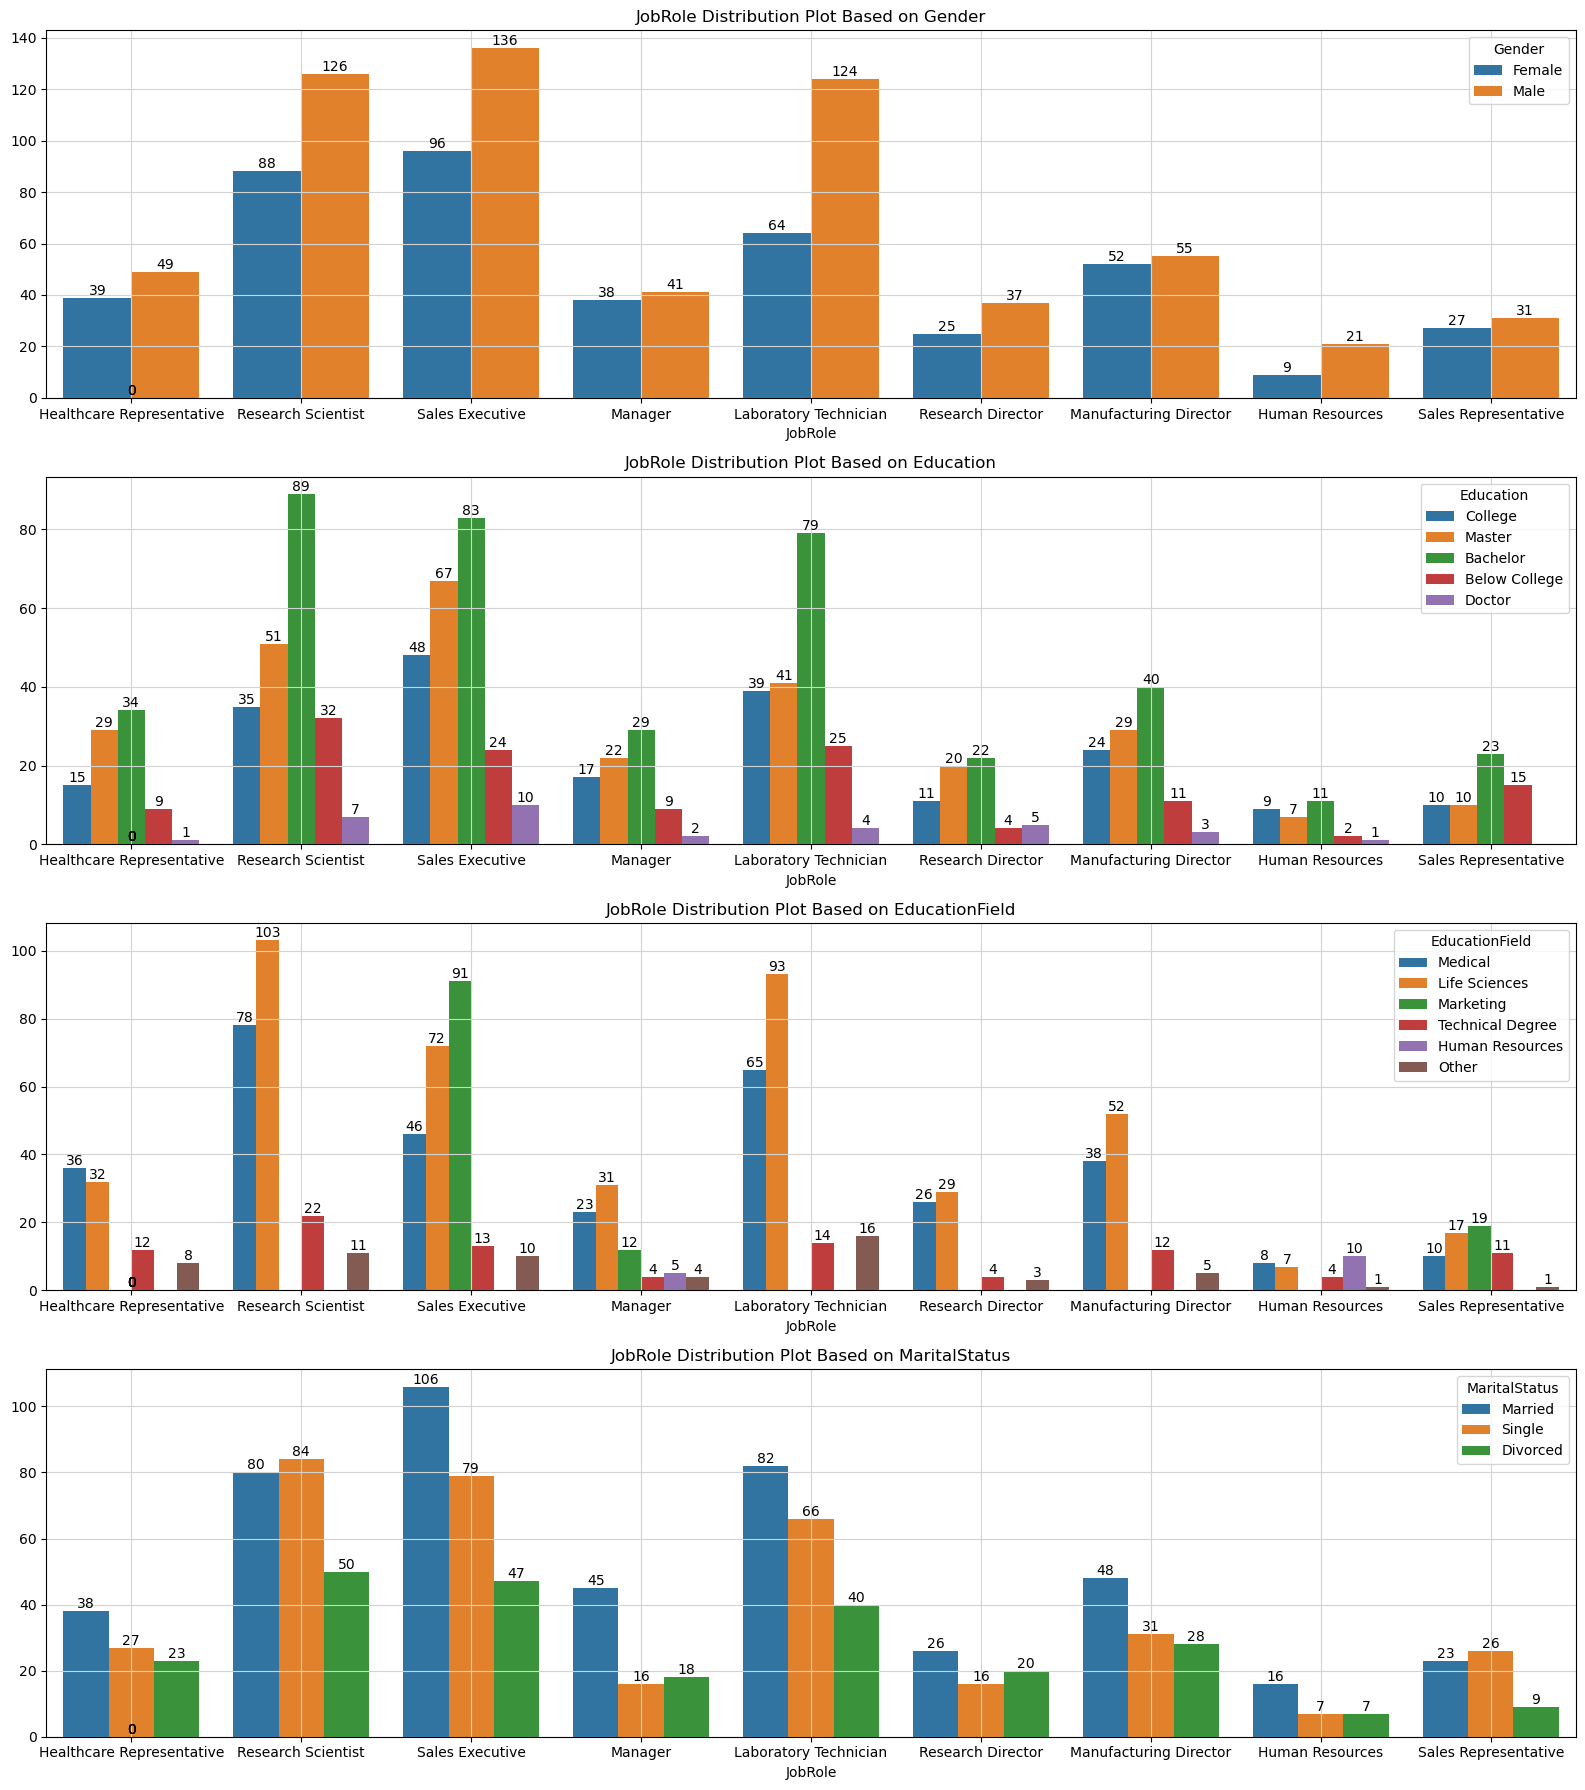

In [28]:
# Distribusi data fitur untuk fitur Gender, Education, EducationField, dan MaritalStatus
categorical_dis_plot(
    features=['Gender', 'Education', 'EducationField', 'MaritalStatus'],
    hr_df=hr_df,
    segment_feature='JobRole'
)

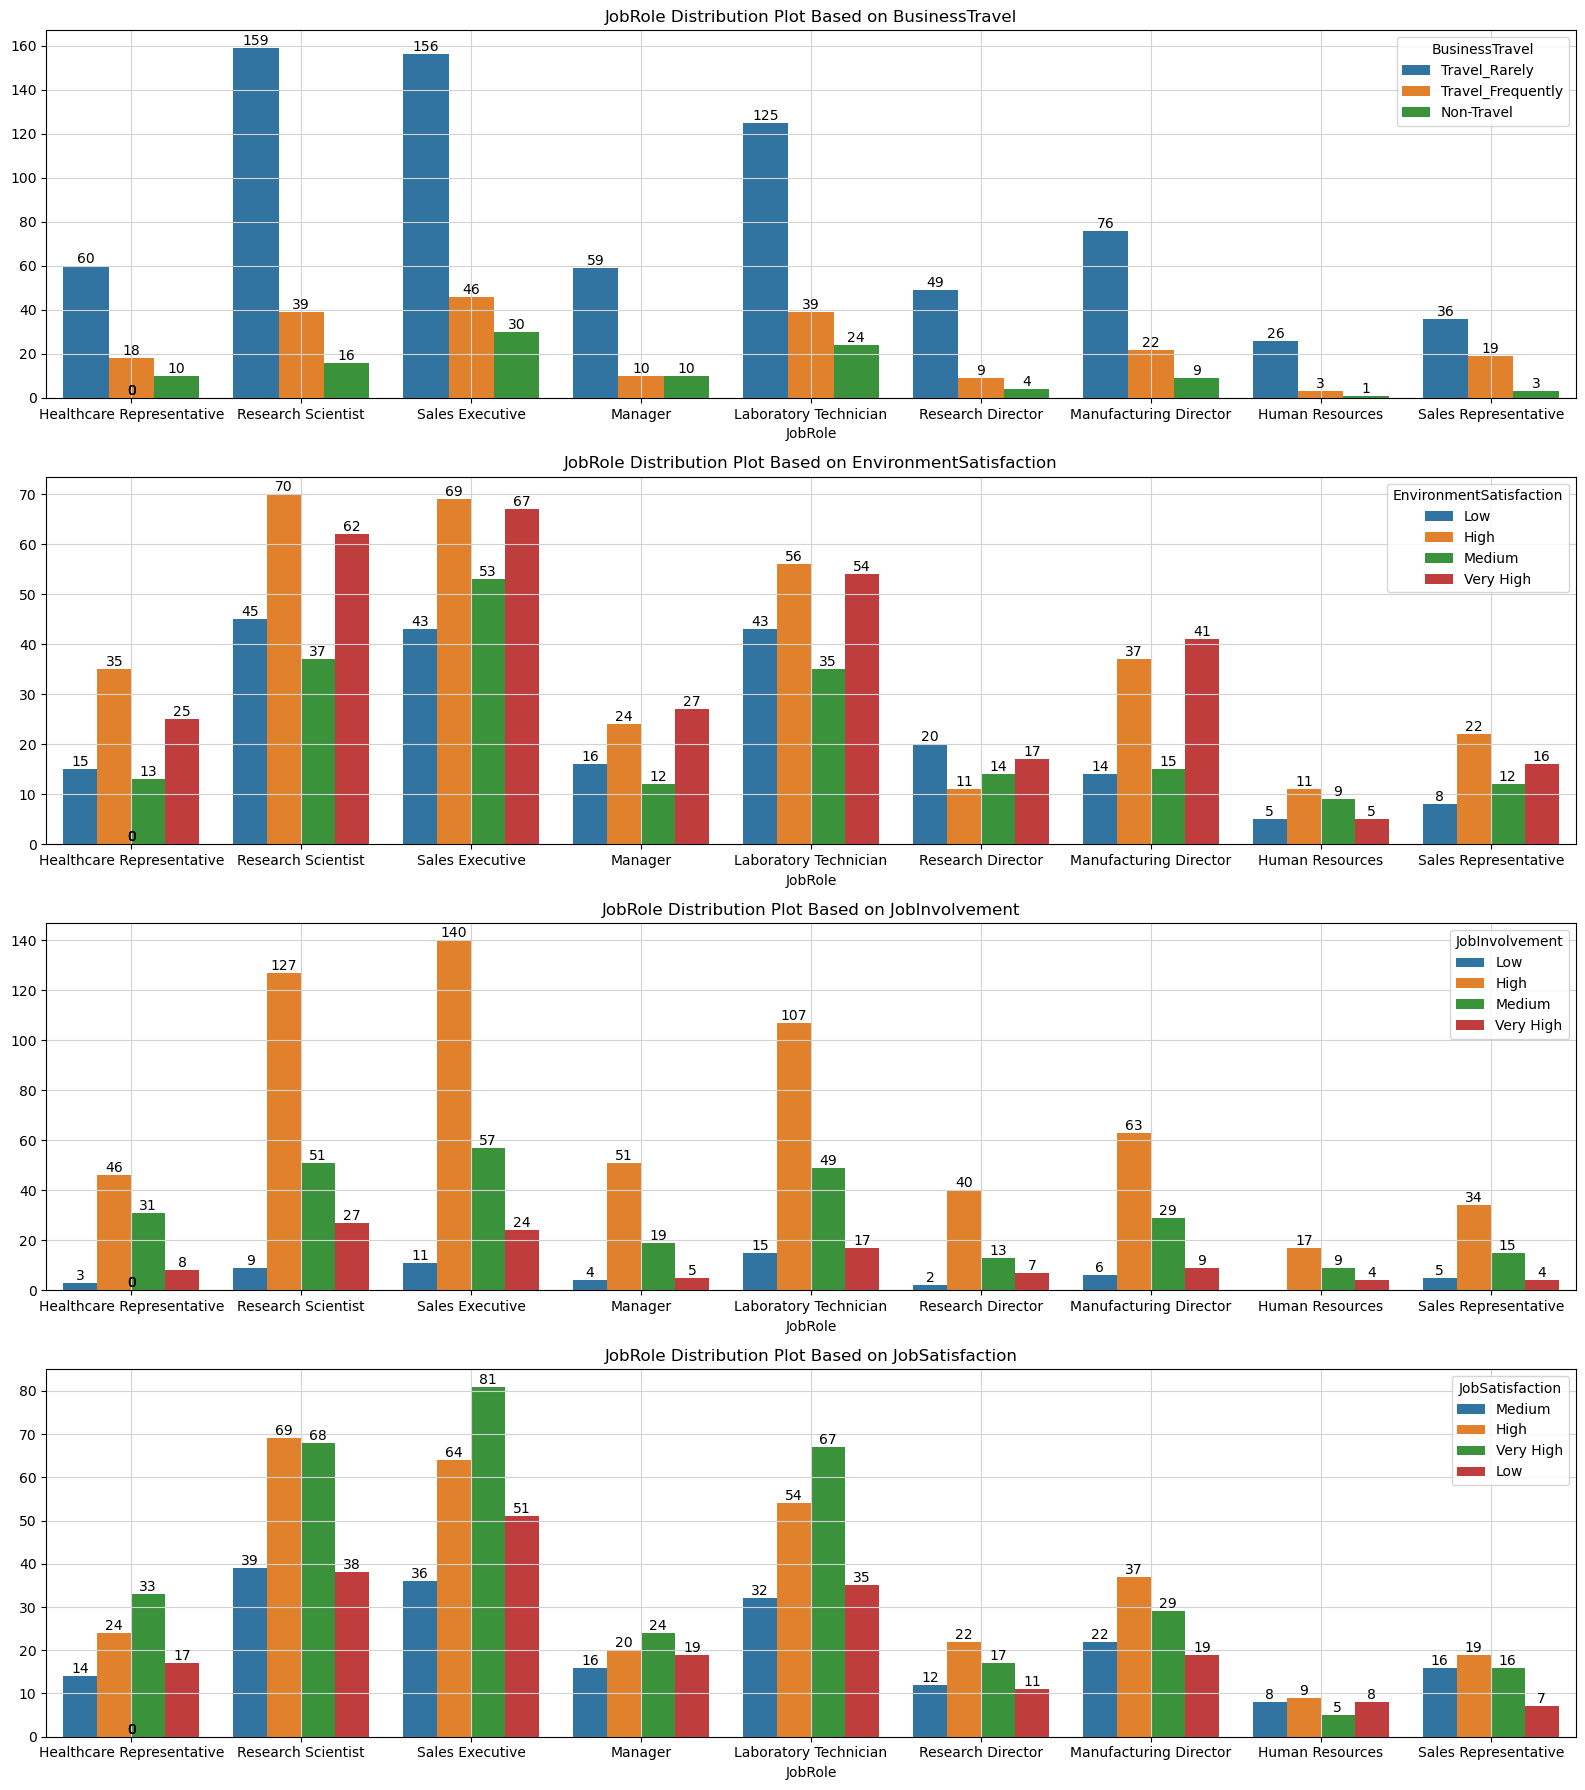

In [29]:
# Distribusi data fitur untuk fitur BusinessTravel, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction
categorical_dis_plot(
    features=['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction'],
    hr_df=hr_df,
    segment_feature='JobRole'
)

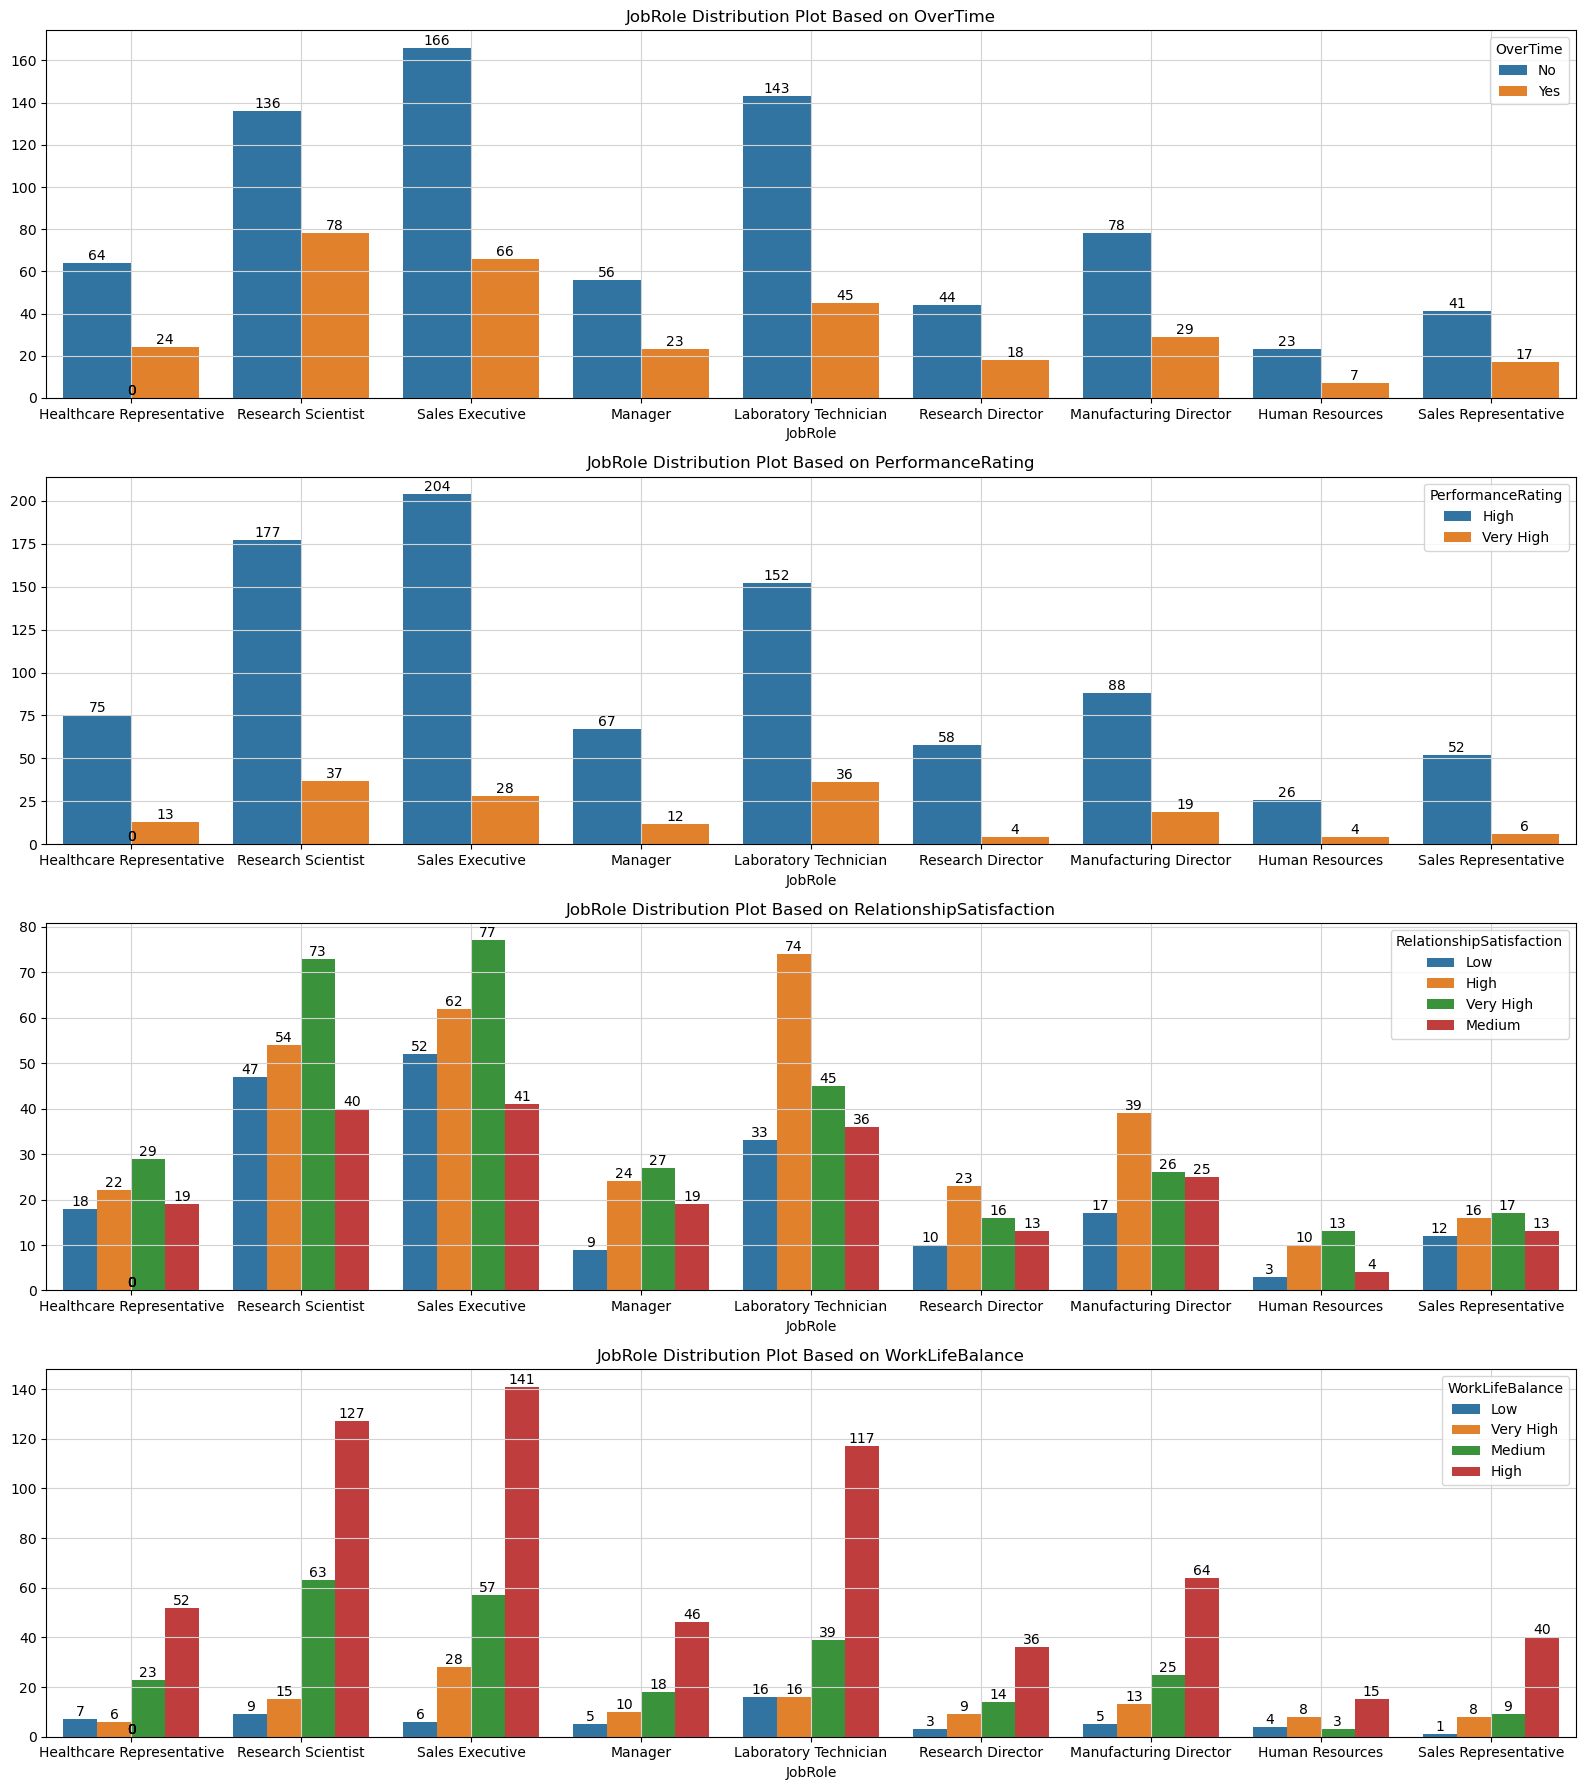

In [30]:
# Distribusi data fitur untuk fitur OverTime, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance
categorical_dis_plot(
    features=['OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
    hr_df=hr_df,
    segment_feature='JobRole'
)

Berdasarkan Department

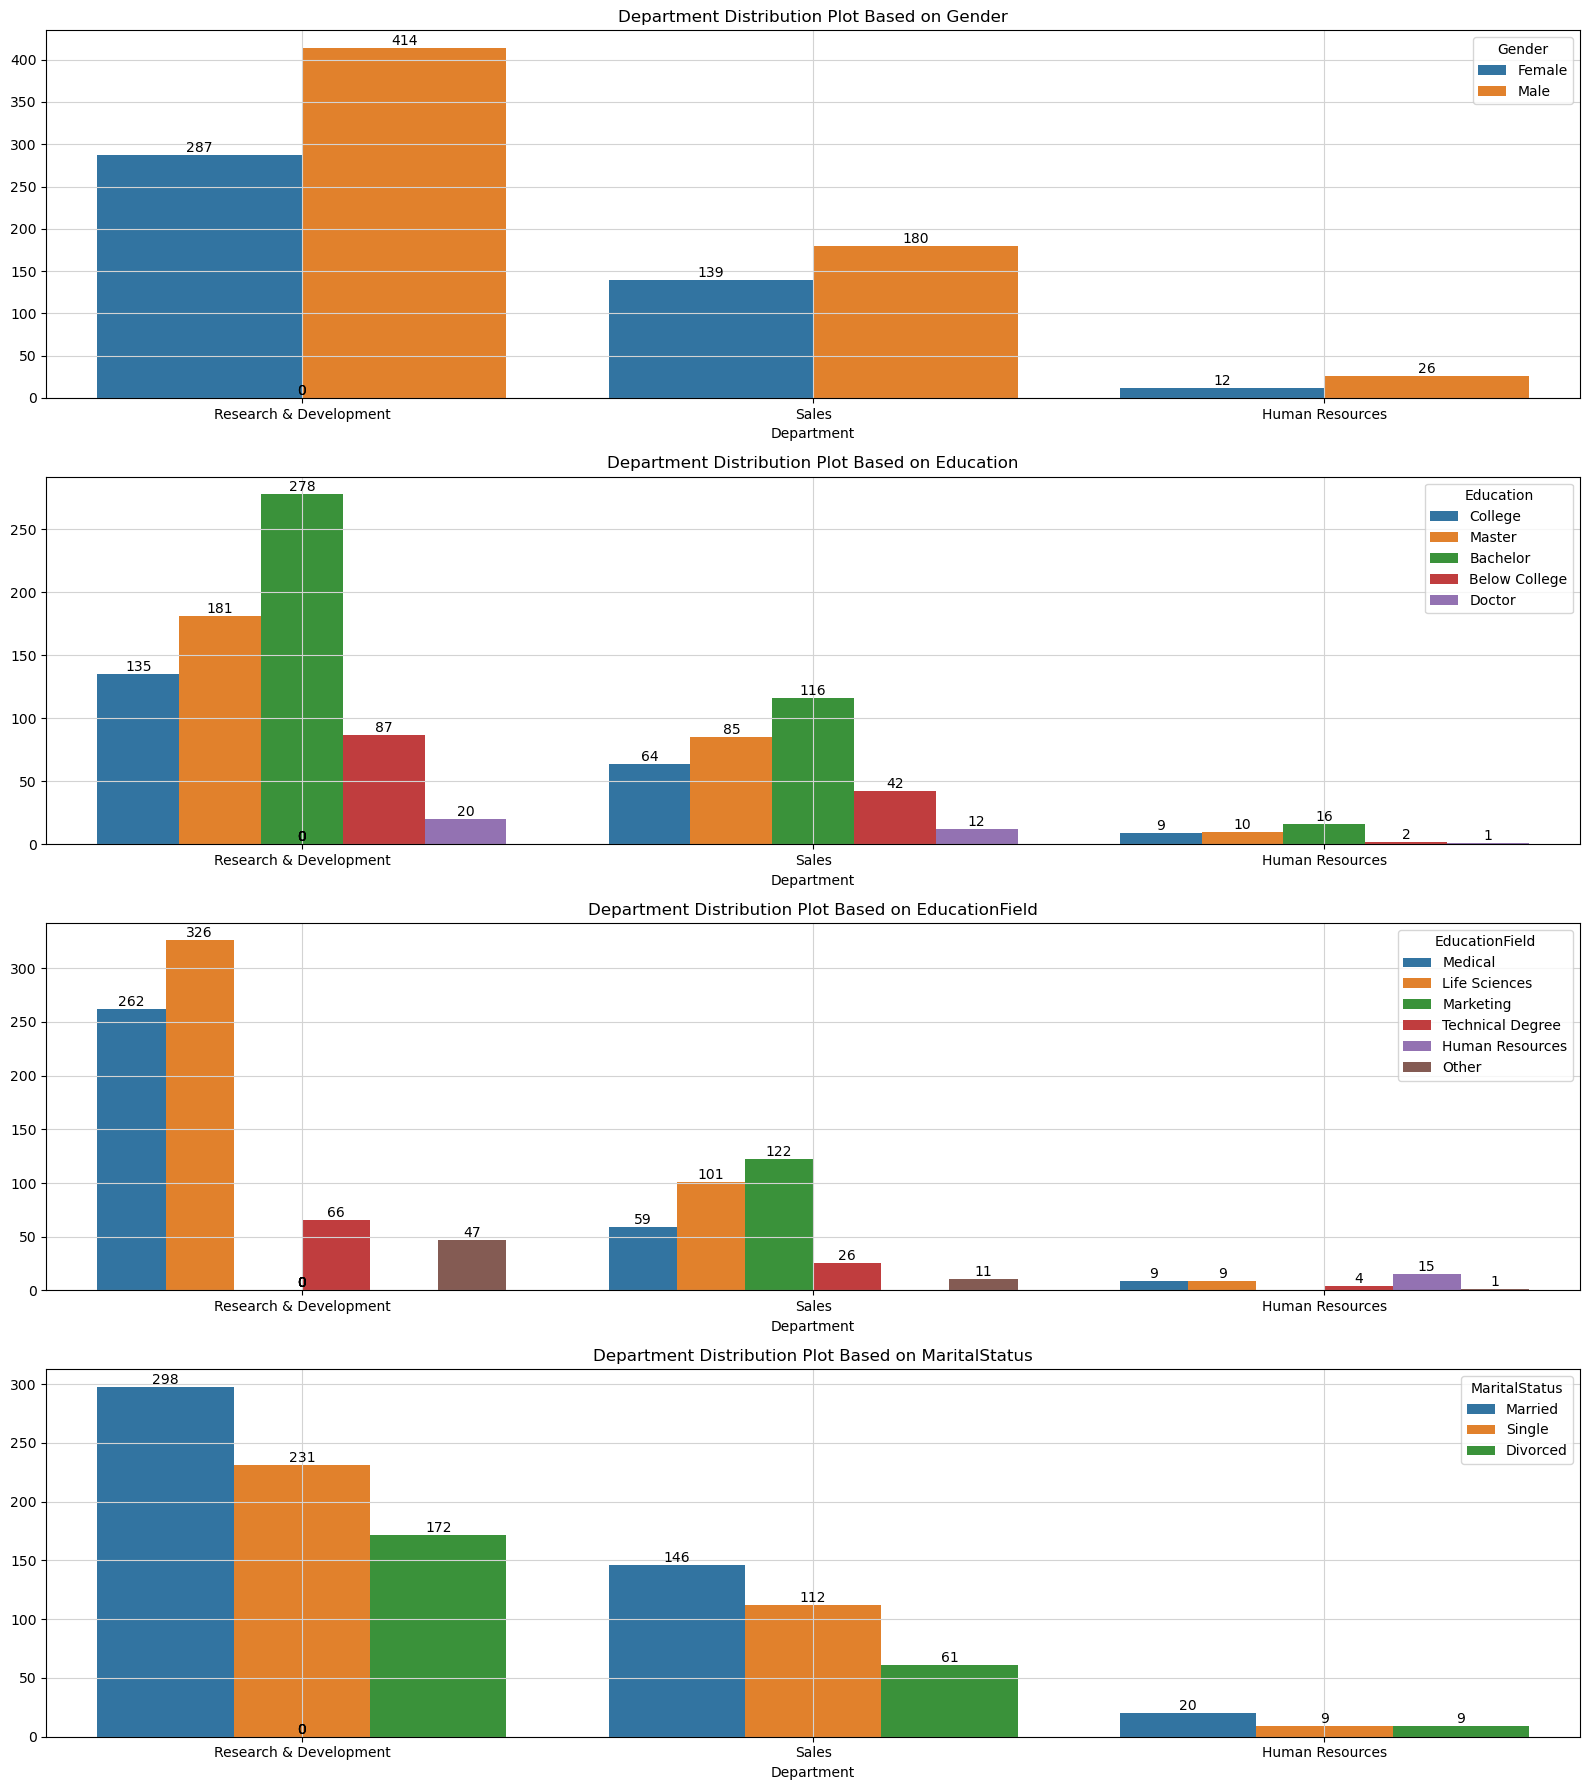

In [31]:
# Distribusi data fitur untuk fitur Gender, Education, EducationField, dan MaritalStatus
categorical_dis_plot(
    features=['Gender', 'Education', 'EducationField', 'MaritalStatus'],
    hr_df=hr_df,
    segment_feature='Department'
)

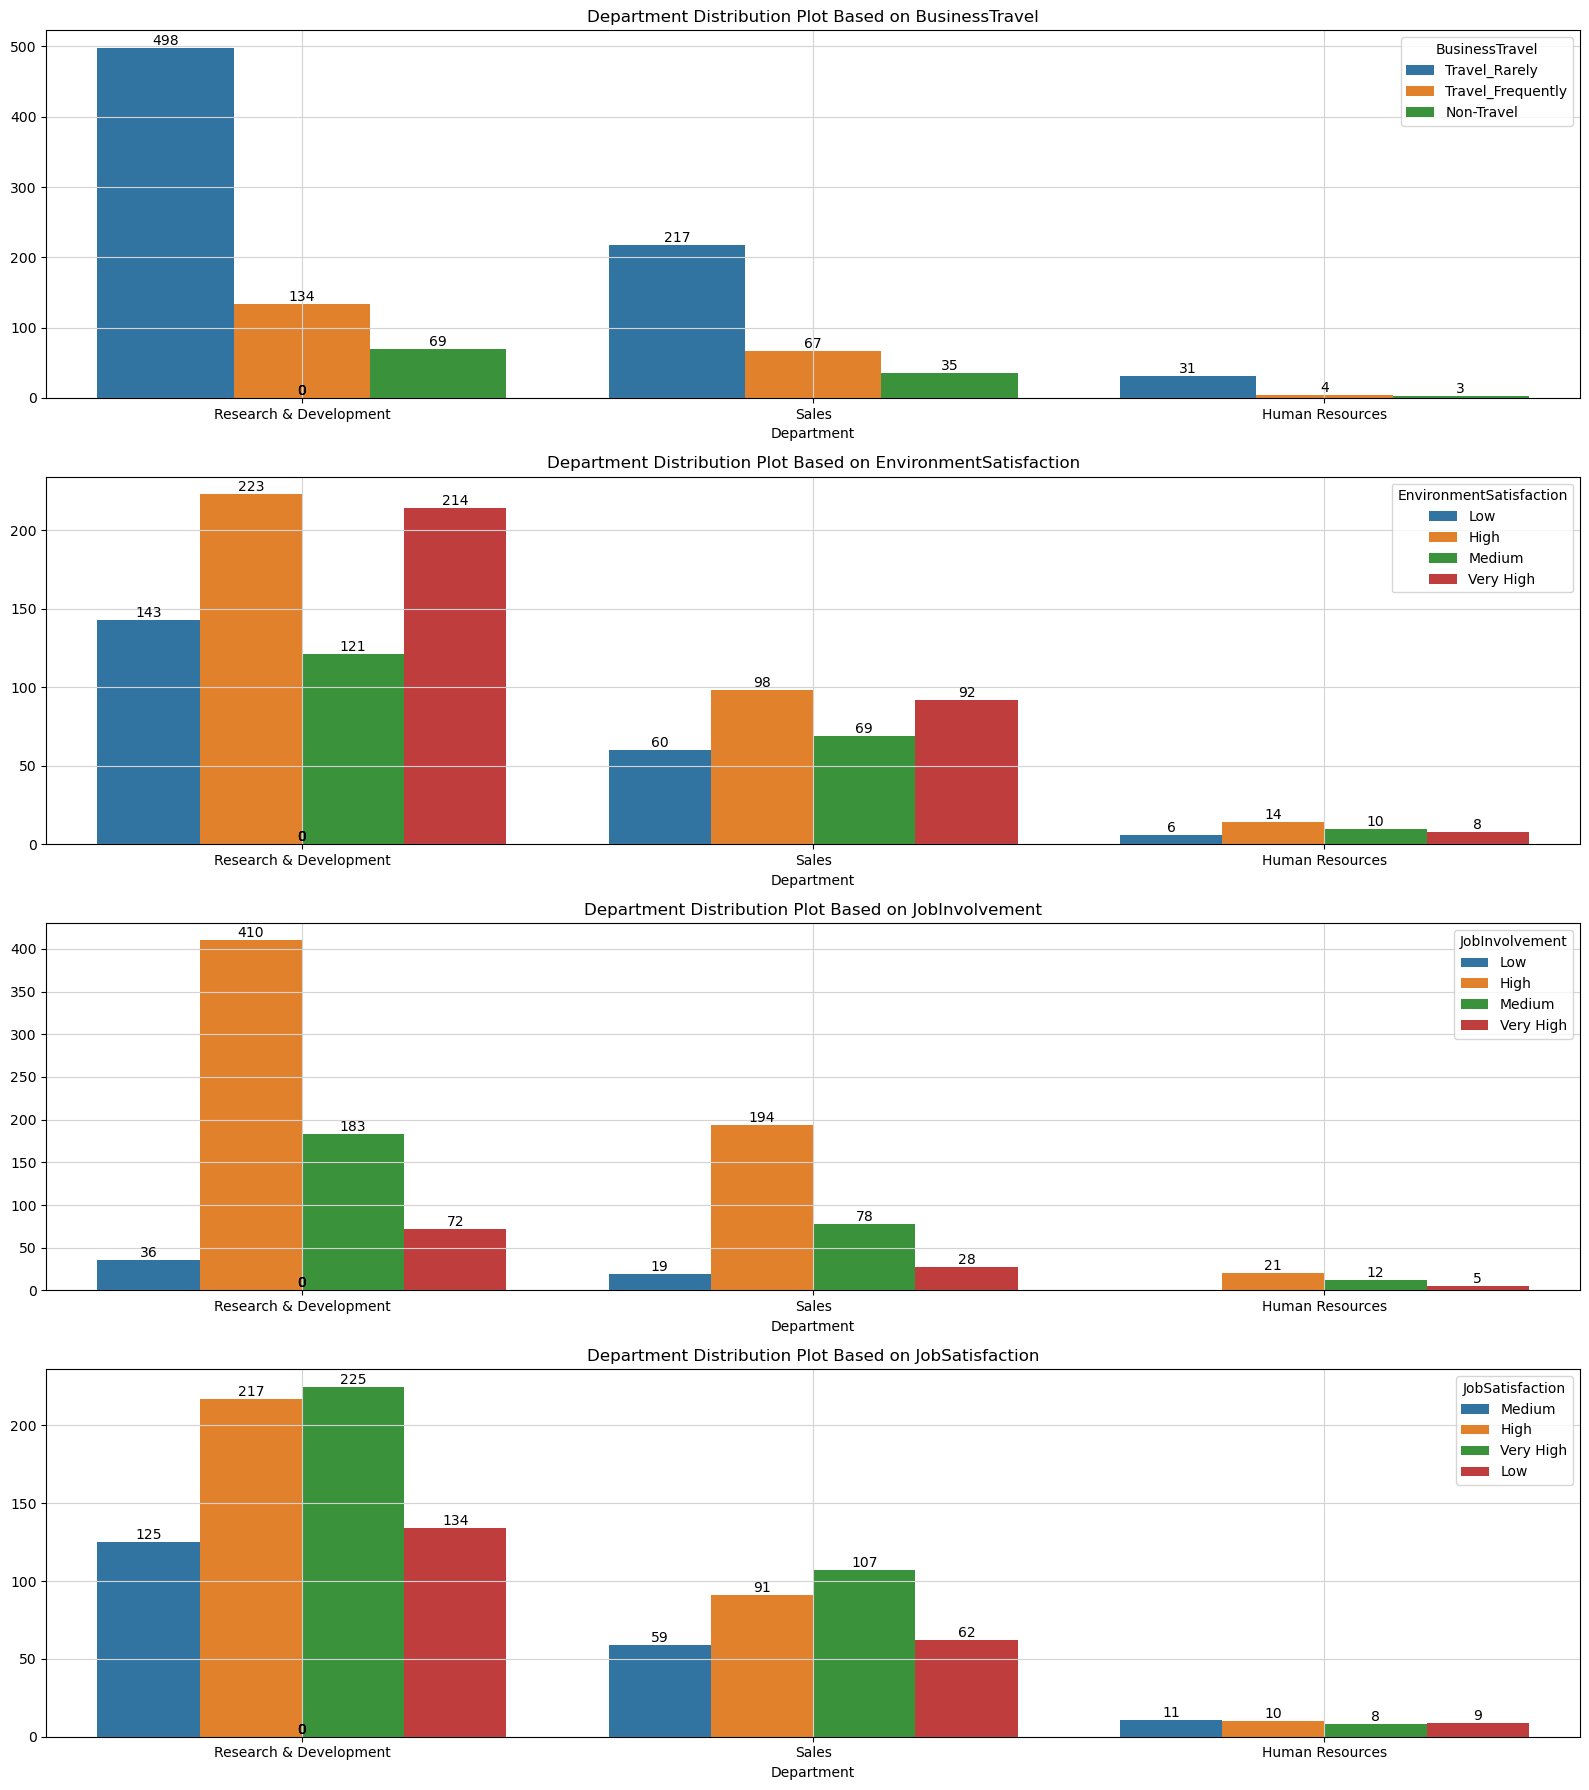

In [32]:
# Distribusi data fitur untuk fitur BusinessTravel, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction
categorical_dis_plot(
    features=['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction'],
    hr_df=hr_df,
    segment_feature='Department'
)

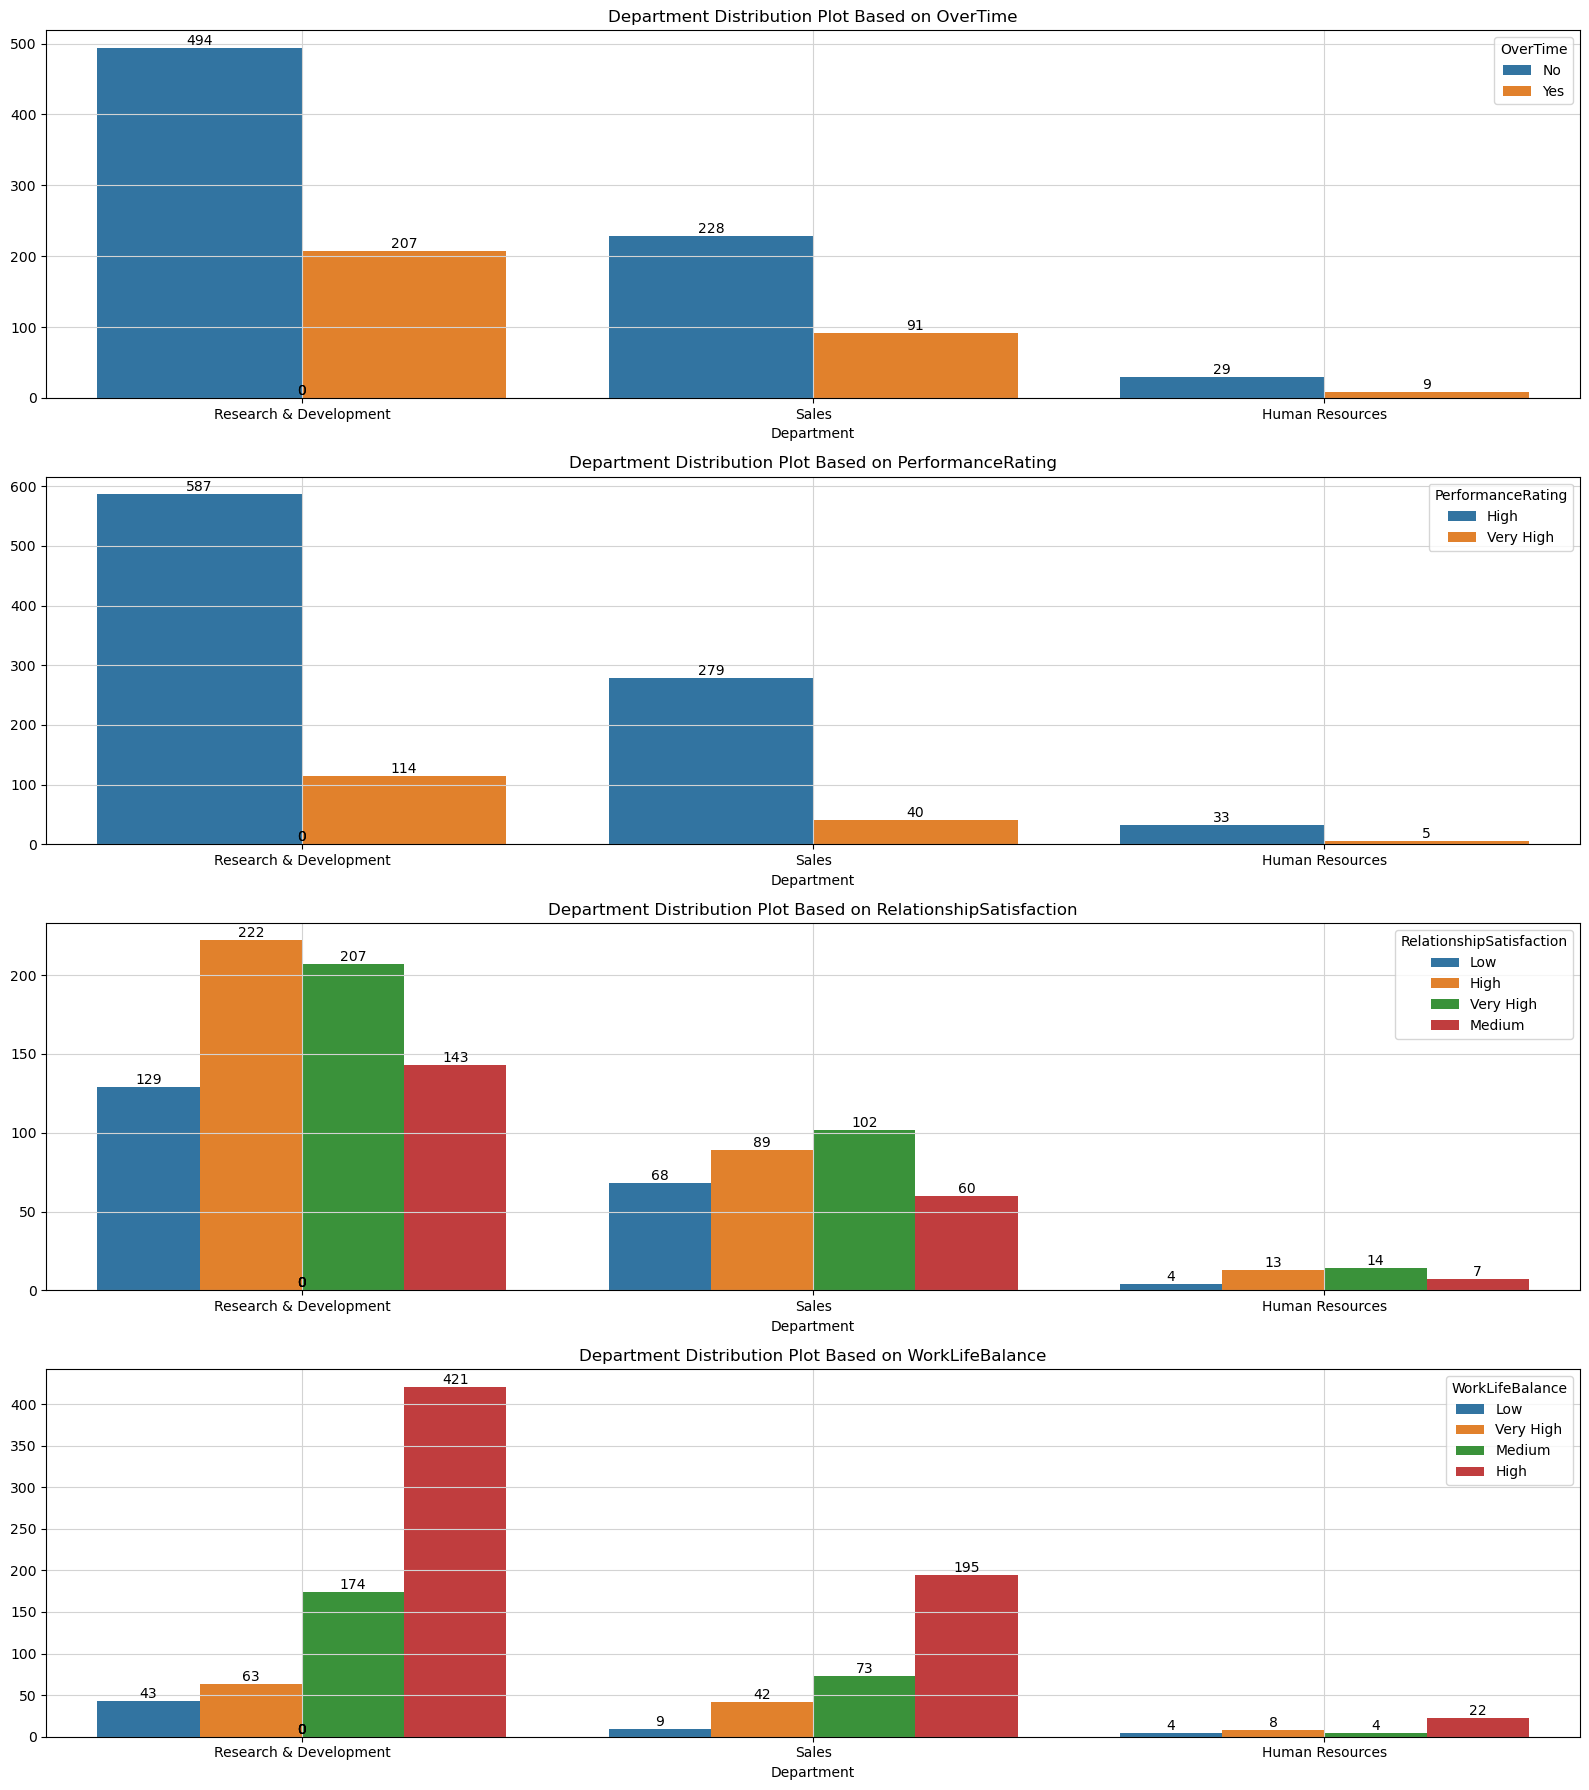

In [33]:
# Distribusi data fitur untuk fitur OverTime, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance
categorical_dis_plot(
    features=['OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
    hr_df=hr_df,
    segment_feature='Department'
)

#### Perbandingan fitur attrition

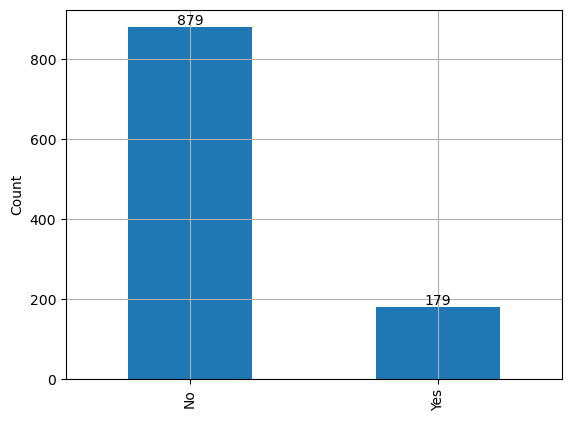

In [34]:
ax = hr_df['Attrition'].value_counts().plot(kind='bar')
ax.grid()
ax.set_ylabel('Count')

for bar in ax.patches:
    ax.annotate(str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

Berdasarkan plot Attrition di atas, jumlah karyawan yang tidak melakukan attrition (0) lebih besar dibandingkan dengan karyawan yang melakukan attrition (1), sehingga dapat disimpulkan bahwa data tidak seimbang atau kondisi data tidak seimbang (inbalance data).

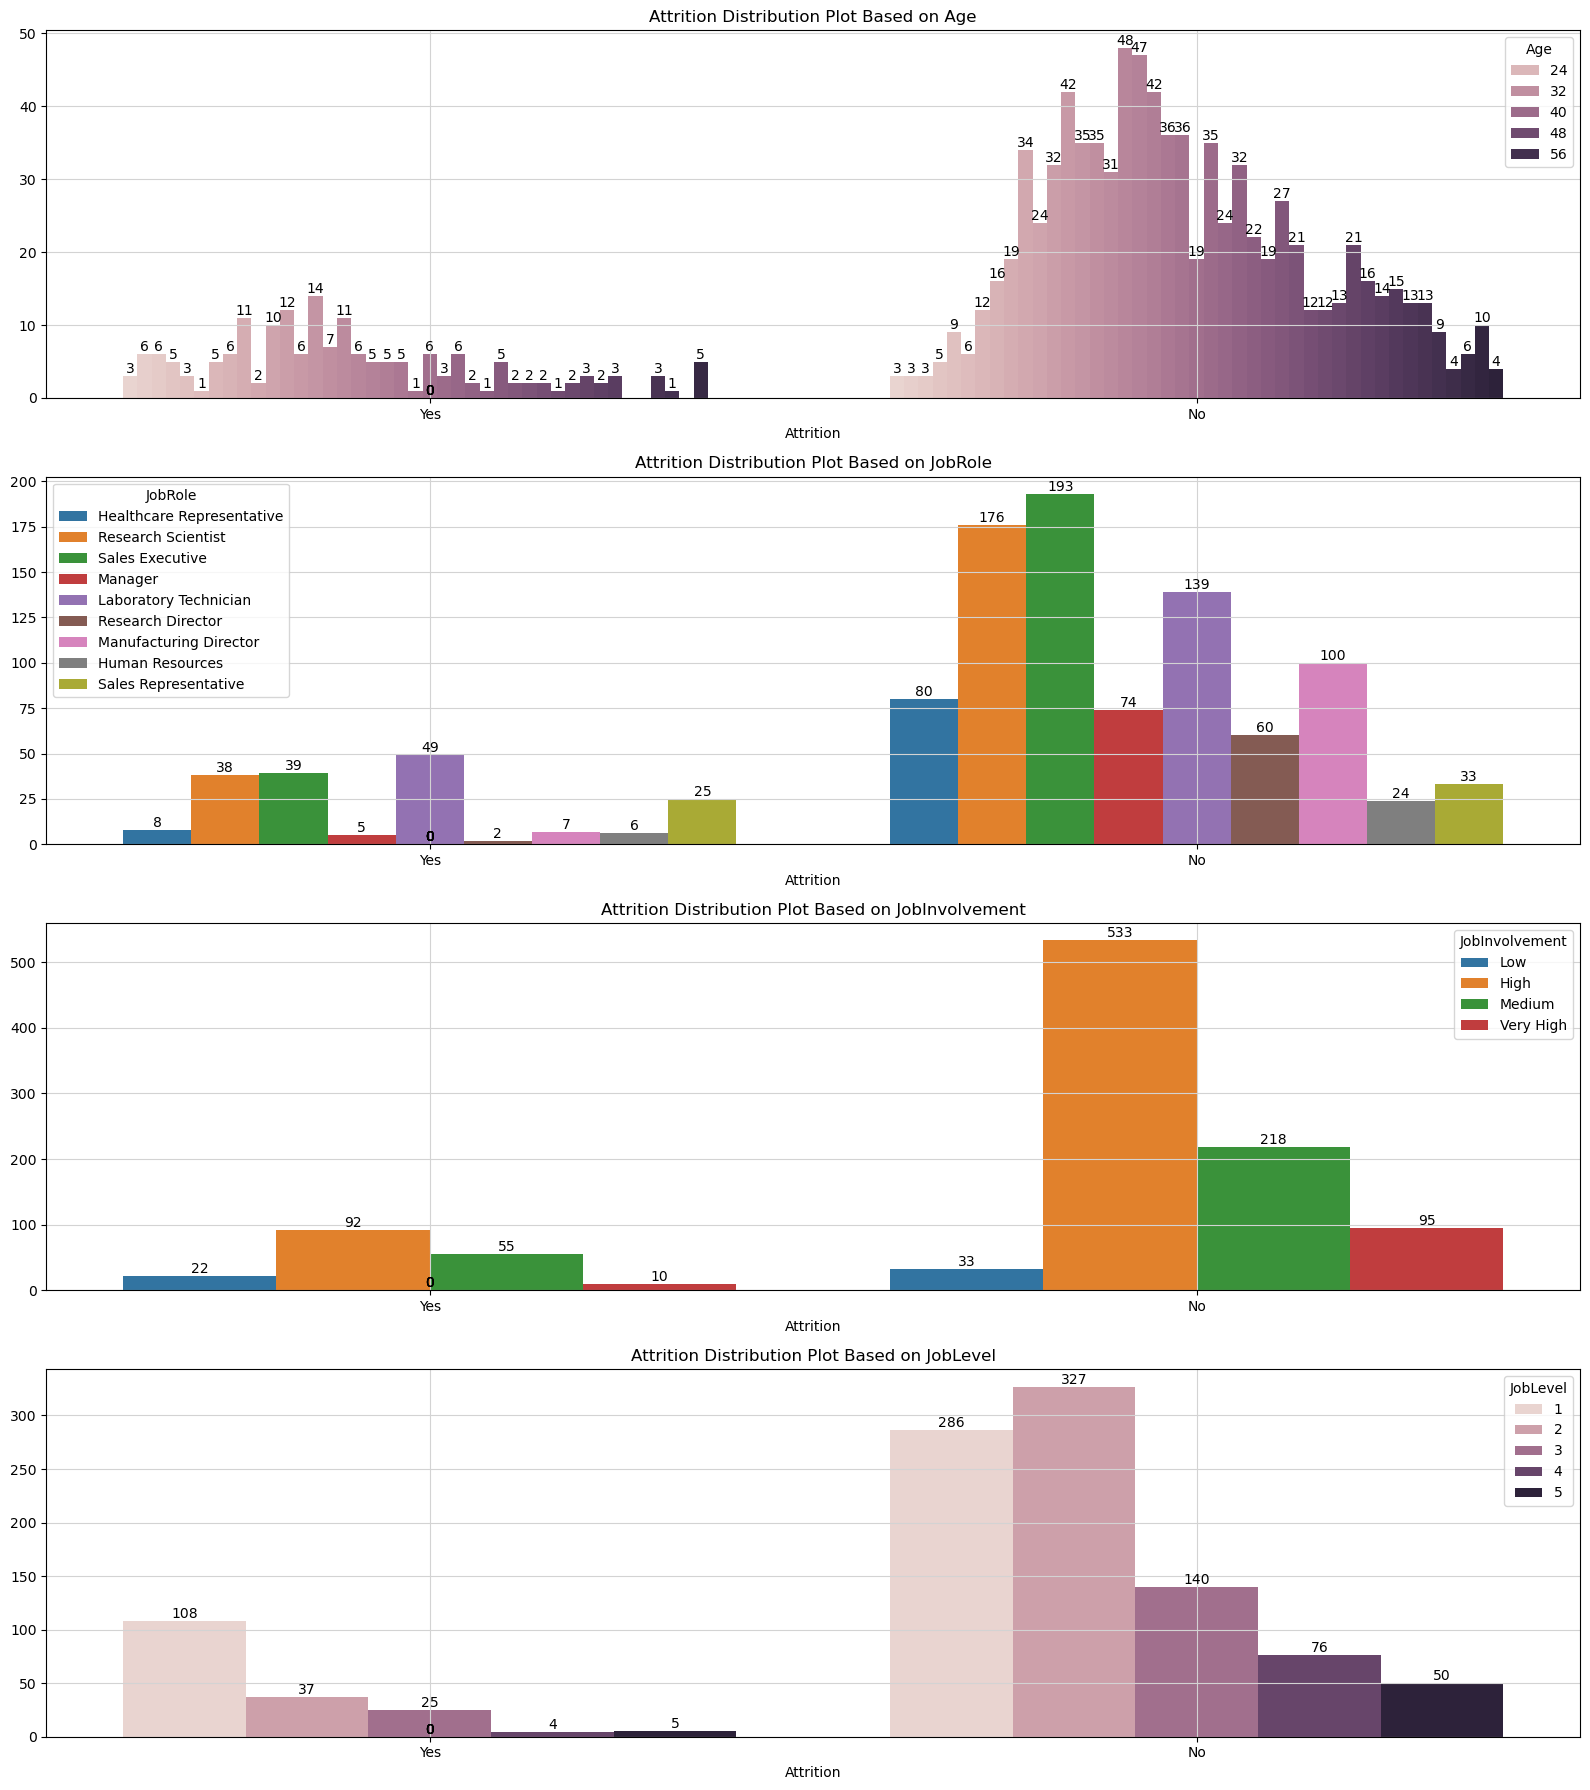

In [35]:
# Distribusi data untuk fitur Age, JobRole, JobInvolvement, dan Joblevel berdasarkan Attrition
categorical_dis_plot(
    features=['Age', 'JobRole', 'JobInvolvement', 'JobLevel'],
    hr_df=hr_df,
    segment_feature='Attrition'
)

Dari plot Attrition di atas, dapat disimpulkan:
1. Berdasarkan usia, jumlah karyawan yang melakukan attrition paling banyak terjadi pada usia 19 tahun, dan usia dua puluhan dan tiga puluhan. Sedangkan tingkat attrition tertinggi adalah pada usia 31 tahun. Dan karyawan yang berusia lima puluhan seperti 53, 54, 57, 59 justru lebih memilih untuk bertahan di perusahaannya.
2. Berdasarkan peran pekerjaan, jumlah karyawan yang memiliki attrition tertinggi adalah mereka yang memiliki peran sebagai teknisi Laboratorium, sedangkan yang paling sedikit adalah mereka yang memiliki peran sebagai Direktur Riset. Selain itu, karyawan yang memiliki peran sebagai Sales Representative memiliki tingkat attrition yang cukup tinggi yang hampir mendekati populasi secara keseluruhan.
3. Berdasarkan job involvement, karyawan yang memiliki job involvement rendah memiliki kecenderungan untuk melakukan attrition yang terlihat jelas mendekati populasi secara keseluruhan.
4. Berdasarkan tingkat jabatan, semakin tinggi tingkat jabatan maka kecenderungan karyawan untuk melakukan attrition semakin kecil.

In [36]:
hr_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Very High,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Very High,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Medium,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,High,5,2,1,4


Dalam dataset ini, fitur label yang digunakan adalah attrition, apakah karyawan meninggalkan perusahaan (1 untuk yes), dan apakah karyawan tetap tinggal dan meninggalkan perusahaan (0 untuk no).

#### Feature Selection

Karena ada beberapa fitur yang tidak berkontribusi atau mempengaruhi tingkat gesekan pada dataset ini, misalnya EmployeeID, maka fitur-fitur tersebut perlu dihilangkan agar model Machine Learning hanya melatih model dari fitur data yang paling berpengaruh.

In [37]:
# Drop the unnecessary feature
hr_df = hr_df.drop('EmployeeId', axis=1)
hr_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,Female,...,Low,80,0,15,2,Low,1,0,0,0
2,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,...,High,80,3,18,2,Very High,10,0,2,7
3,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,Female,...,Very High,80,1,23,2,Very High,20,4,4,8
6,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,Male,...,High,80,3,6,2,Medium,4,3,0,2
7,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,Male,...,Very High,80,1,24,2,High,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,Male,...,Low,80,0,10,2,Medium,10,7,1,9
1465,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,Female,...,Very High,80,0,10,4,Very High,1,0,0,0
1467,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,Female,...,Very High,80,0,1,4,Medium,1,1,0,0
1468,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,Male,...,Medium,80,1,6,0,High,4,2,0,0


#### Label Encoding

In [38]:
numerical, categorical = [], []

for feature in hr_df.columns:
    if hr_df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

In [39]:
# Categorical features that need to be encoded
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [40]:
le = LabelEncoder()
hr_df[categorical] = hr_df[categorical].apply(le.fit_transform)

#### Data Normalization

In [41]:
# Numerical features that need to be normalized
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [42]:
scaler = MinMaxScaler()
hr_df[numerical] = scaler.fit_transform(hr_df[numerical])

In [43]:
# Lihat data kembali
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0.452381,1,2,0.743737,1,0.357143,2,3,1,0,...,1,0.0,0.000000,0.375,0.333333,1,0.025,0.000000,0.000000,0.000000
2,0.785714,1,2,0.874016,1,0.107143,4,1,1,1,...,0,0.0,1.000000,0.450,0.333333,3,0.250,0.000000,0.133333,0.411765
3,0.571429,0,1,0.324266,2,0.892857,0,2,0,0,...,3,0.0,0.333333,0.575,0.333333,3,0.500,0.222222,0.266667,0.470588
6,0.523810,0,2,0.731568,2,0.000000,2,3,2,1,...,0,0.0,1.000000,0.150,0.333333,2,0.100,0.166667,0.000000,0.117647
7,0.880952,1,2,0.445956,1,0.035714,0,3,3,1,...,3,0.0,0.333333,0.600,0.333333,0,0.125,0.111111,0.066667,0.235294


In [44]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1058 non-null   float64
 1   Attrition                 1058 non-null   int32  
 2   BusinessTravel            1058 non-null   int32  
 3   DailyRate                 1058 non-null   float64
 4   Department                1058 non-null   int32  
 5   DistanceFromHome          1058 non-null   float64
 6   Education                 1058 non-null   int32  
 7   EducationField            1058 non-null   int32  
 8   EnvironmentSatisfaction   1058 non-null   int32  
 9   Gender                    1058 non-null   int32  
 10  HourlyRate                1058 non-null   float64
 11  JobInvolvement            1058 non-null   int32  
 12  JobLevel                  1058 non-null   float64
 13  JobRole                   1058 non-null   int32  
 14  JobSatis

In [45]:
hr_df.describe().round(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,...,1058.0000,1058.0,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000
mean,0.4537,0.1692,1.6040,0.5065,1.2656,0.2849,1.6541,2.2552,1.4660,0.5860,...,1.5028,0.0,0.2543,0.2859,0.4616,0.8478,0.1766,0.2367,0.1469,0.2437
std,0.2241,0.3751,0.6647,0.2924,0.5169,0.2872,1.6222,1.3255,1.2154,0.4928,...,1.2143,0.0,0.2792,0.2004,0.2171,1.1160,0.1566,0.2010,0.2178,0.2117
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2857,0.0000,1.0000,0.2600,1.0000,0.0357,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.1500,0.3333,0.0000,0.0750,0.1111,0.0000,0.1176
50%,0.4286,0.0000,2.0000,0.5122,1.0000,0.2143,1.0000,2.0000,1.0000,1.0000,...,2.0000,0.0,0.3333,0.2500,0.5000,0.0000,0.1250,0.1667,0.0667,0.1765
75%,0.5952,0.0000,2.0000,0.7634,2.0000,0.4286,4.0000,3.0000,3.0000,1.0000,...,3.0000,0.0,0.3333,0.4000,0.5000,2.0000,0.2250,0.3889,0.2000,0.4118
max,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,4.0000,5.0000,3.0000,1.0000,...,3.0000,0.0,1.0000,1.0000,1.0000,3.0000,1.0000,1.0000,1.0000,1.0000


#### Data Split

In [46]:
# Bagi data menjadi variabel independen (X) dan variabel dependen (y) sebagai label
X = hr_df.drop(['Attrition'], axis=1)
y = hr_df['Attrition']
     

# Bagi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,  random_state=20241116, stratify=y)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (846, 31)
y_train : (846,)
X_test  : (212, 31)
y_test  : (212,)


Scaling dan SMOTE

In [47]:
# Terapkan SMOTE HANYA pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Modeling

In [48]:
# Inisialisasi model dan metrik
models, accuracy, precision, recall, f1 = {}, {}, {}, {}, {}

# Penggunaan beberapa algoritma untuk memilih algoritma terbaik
models['LR'] = LogisticRegression(class_weight='balanced', max_iter=10000)
models['SVM'] = SVC(class_weight='balanced', max_iter=10000, probability=True)
models['DT'] = DecisionTreeClassifier(class_weight='balanced')
models['GB'] = GradientBoostingClassifier()
models['XGB'] = XGBClassifier()
models['RF'] = RandomForestClassifier(class_weight='balanced')
models['KNN'] = KNeighborsClassifier()
models['NB'] = GaussianNB()

In [49]:
# Latih model
for i in models.keys():
    models[i].fit(X_train_resampled, y_train_resampled)

    pred = models[i].predict(X_test)

    accuracy[i] = accuracy_score(pred, y_test)
    precision[i] = precision_score(pred, y_test)
    recall[i] = recall_score(pred, y_test)
    f1[i] = f1_score(pred, y_test)

In [50]:
# Hitung akurasi, prediksi, recall, dan f1 socre
model_metrics = pd.DataFrame({
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'F1-Score': f1.values()
}, index=models.keys())

model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.735849,0.750000,0.364865,0.490909
SVM,0.750000,0.611111,0.360656,0.453608
DT,0.745283,0.472222,0.326923,0.386364
GB,0.882075,0.527778,0.703704,0.603175
XGB,0.853774,0.444444,0.592593,0.507937
RF,0.849057,0.333333,0.600000,0.428571
KNN,0.617925,0.666667,0.258065,0.372093
NB,0.551887,0.777778,0.243478,0.370861


Berdasarkan metrik evaluasi untuk setiap model, Gradient Boosting Classifier memiliki akurasi model yang paling tinggi di antara yang lain, sehingga model ini yang akan digunakan.

In [51]:
# Gunakan model terbaik
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb

GradientBoostingClassifier()

In [52]:
# Prediksi attrition
y_train_gb = model_gb.predict(X_train)
y_test_gb = model_gb.predict(X_test)

## Evaluation

In [53]:
# Defenisi evaluasi hasil prediksi model
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Attrition', fontsize=10)
    plt.xlabel('Predicted Label Attrition', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       703
           1       1.00      0.80      0.89       143

    accuracy                           0.97       846
   macro avg       0.98      0.90      0.93       846
weighted avg       0.97      0.97      0.96       846



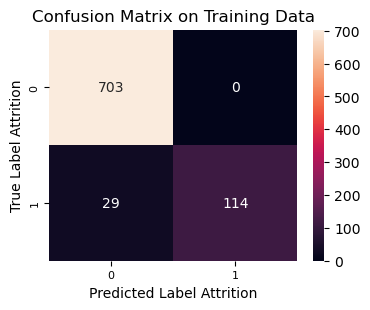

In [54]:
# Evaluasi data train
evaluation_report(y_train, y_train_gb, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       176
           1       0.54      0.36      0.43        36

    accuracy                           0.84       212
   macro avg       0.71      0.65      0.67       212
weighted avg       0.82      0.84      0.83       212



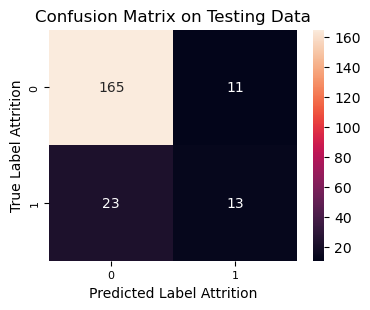

In [55]:
# Evaluasi data test
evaluation_report(y_test, y_test_gb, title='Testing Data')

#### Hyperparameter Tuning

In [56]:
# Hyperparameter tuning menggunakan grid search cross validation
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 250, 500],
    'subsample': [1.0],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_depth': [3, 10, 20]

}

In [57]:
clf = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
clf

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 250, 500], 'subsample': [1.0]},
             verbose=3)

In [58]:
# Gunakan parameter untuk diterapkan pada model terbaik
best_model = clf.fit(X_train, y_train)
best_model.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GradientBoostingClassifier(max_depth=20, min_samples_leaf=10,
                           min_samples_split=3, n_estimators=500)

In [59]:
# Prediksi data train dan test menggunakan model terbaik
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      1.00      1.00       143

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



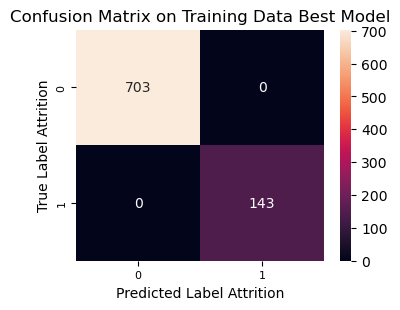

In [60]:
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       176
           1       0.64      0.25      0.36        36

    accuracy                           0.85       212
   macro avg       0.75      0.61      0.64       212
weighted avg       0.83      0.85      0.82       212



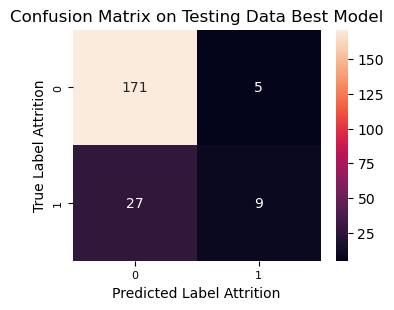

In [62]:
evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

#### Export model and requirement.txt

In [ ]:
joblib.dump(best_model, 'best_model_gb.joblib')

['best_model_gb.joblib']

In [63]:
!pip freeze > requirement.txt